# **Project Name**    - 



##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

The Credit Card Default Prediction Classification ML Project aims to develop a machine learning model that accurately predicts the likelihood of credit card holders defaulting on their payments. The project addresses the crucial need for financial institutions to identify high-risk customers and take proactive measures to mitigate potential losses.

The project utilizes historical credit card data, including various features such as demographics, credit limit, payment history, and transaction details, to train and evaluate the predictive model. By leveraging machine learning algorithms and techniques, the project team aims to build a robust and accurate classification model capable of distinguishing between customers who are likely to default and those who are not.

The project follows a structured approach, including the following key steps:

* Data Collection and Exploration: Gathering relevant credit card data from various sources and performing exploratory data analysis (EDA) to gain insights into the dataset.

* Data Preprocessing and Feature Engineering: Preparing the data for modeling by cleaning, transforming, and normalizing it. Feature engineering techniques are applied to derive new meaningful features that could enhance the predictive power of the model.

* Model Selection and Training: Selecting appropriate machine learning algorithms for classification, such as logistic regression, decision trees, random forests, or gradient boosting. Multiple models are explored and their performance is evaluated using suitable evaluation metrics like accuracy, precision, recall, and F1-score. The models are trained on the labeled dataset and fine-tuned using techniques like cross-validation or grid search.

* Model Evaluation and Validation: Assessing the performance of the trained models on a separate validation dataset to ensure generalizability and selecting the model which the best results.

The project aims to deliver a credit card default prediction model that provides financial institutions with a valuable tool to make informed decisions and allocate resources more efficiently. By identifying high-risk customers beforehand, banks can take preventive actions, such as offering credit counseling, adjusting credit limits, or initiating collection processes, ultimately reducing the overall credit risk and potential financial losses.

Overall, the Credit Card Default Prediction Classification ML Project aims to contribute to the advancement of the financial industry by harnessing the power of machine learning to improve credit risk assessment and decision-making processes.

# **GitHub Link -**

https://github.com/Dheeraj-Budhlakoti/Credit_Card_Default_Prediction

# **Problem Statement**


###**Business Context**

**This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments**


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [285]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

# to display full set of column data
pd.pandas.set_option('display.max_columns',None)

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import precision_score,recall_score,f1_score

from sklearn.linear_model import LogisticRegression

### Dataset Loading

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load Dataset
df=pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Capstone Project Classification/default of credit card clients.xls',header=1)

### Dataset First View

In [6]:
# Dataset First Look
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
print(f"Total Rows: {df.shape[0]}")
print(f"Total Columns: {df.shape[1]}")

Total Rows: 30000
Total Columns: 25


### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

<Axes: >

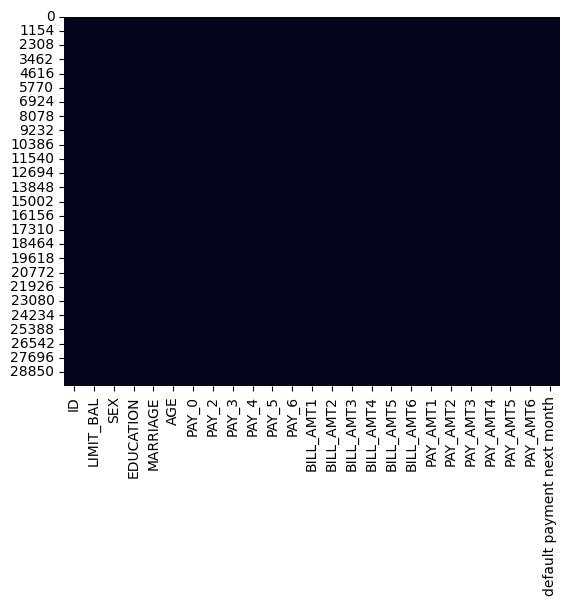

In [11]:
# Visualizing the missing values
sns.heatmap(df.isna(), cbar=False)

### What did you know about your dataset?

* The dataset given is a historical credit card data ,it contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan and we have to analyse it and use it to for predict default payment next month.

* The above dataset has 25 features with 30,000 rows of data. There are no missing and duplicate values in the dataset.

* 'default payment next month' is our dependent variable column and rest columns are our independent variables.

* All the columns are of int64 datatype.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [13]:
# Dataset Describe
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


### Variables Description 

* **ID**: ID of each client
* **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
* **SEX**: Gender (1=male, 2=female)
* **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* **MARRIAGE**: Marital status (1=married, 2=single, 3=others)
* **AGE**: Age in years
* **PAY_0**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* **PAY_2**: Repayment status in August, 2005 (scale same as above)
* **PAY_3**: Repayment status in July, 2005 (scale same as above)
* **PAY_4**: Repayment status in June, 2005 (scale same as above)
* **PAY_5**: Repayment status in May, 2005 (scale same as above)
* **PAY_6**: Repayment status in April, 2005 (scale same as above)
* **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)
* **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)
* **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)
* **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)
* **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)
* **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)
* **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)
* **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)
* **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)
* **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)
* **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)
* **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)
* **default.payment.next.month**: Default payment (1=yes, 0=no)

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.

# dropping ID column as its unique for every data point
df.drop('ID',axis=1, inplace=True)
# Creating a copy of the dataset for EDA
copy_df=df.copy()

In [16]:
# renaming all columns similar to the no.s assigned for each month in all columns i.e.
# 1 - September
# 2 - August
# 3 - July
# 4 - June 
# 5 - May
# 6 - April
copy_df.rename(columns={'PAY_0':'PAY_SEPT',
                   'PAY_2':'PAY_AUG',
                   'PAY_3':'PAY_JULY',
                   'PAY_4':'PAY_JUNE',
                   'PAY_5':'PAY_MAY',
                   'PAY_6':'PAY_APRIL'}, inplace=True)

copy_df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT',
                   'BILL_AMT2':'BILL_AMT_AUG',
                   'BILL_AMT3':'BILL_AMT_JULY',
                   'BILL_AMT4':'BILL_AMT_JUNE',
                   'BILL_AMT5':'BILL_AMT_MAY',
                   'BILL_AMT6':'BILL_AMT_APRIL'}, inplace=True)

copy_df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT',
                   'PAY_AMT2':'PAY_AMT_AUG',
                   'PAY_AMT3':'PAY_AMT_JULY',
                   'PAY_AMT4':'PAY_AMT_JUNE',
                   'PAY_AMT5':'PAY_AMT_MAY',
                   'PAY_AMT6':'PAY_AMT_APRIL'}, inplace=True)

In [17]:
copy_df.head(2)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JULY,PAY_JUNE,PAY_MAY,PAY_APRIL,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JULY,BILL_AMT_JUNE,BILL_AMT_MAY,BILL_AMT_APRIL,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JULY,PAY_AMT_JUNE,PAY_AMT_MAY,PAY_AMT_APRIL,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1


### What all manipulations have you done and insights you found?

* There was not much data wrangling needed here, so I just dropped the 'ID' column which is unique for every point and then created a copy of the orginal df to work on.
* Then I also changed the column month no.s with their respective names so as to reduce confusion during analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart 1 - Dependent Variable Distribution (Univariate)

In [18]:
# Checking value counts for dependent variable
copy_df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

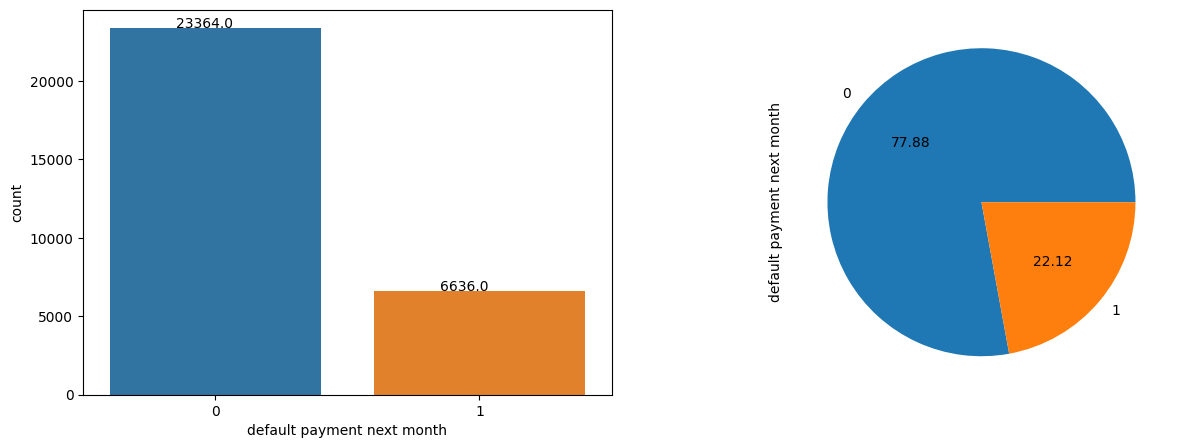

In [19]:
# Chart - 1 visualization code
plt.figure(figsize=(15,5))

plt.subplot(121)
ax= sns.countplot(x=copy_df['default payment next month'])
for i in ax.patches:
  ax.annotate('{:.1f}'.format(i.get_height()), (i.get_x()+0.25, i.get_height()+0.01))

plt.subplot(122)
copy_df['default payment next month'].value_counts().plot(kind='pie',autopct='%.2f')
plt.show()

##### 1. Why did you pick the specific chart?

* I picked countplot and pie chart here as it's easy to compare between default and not default payments using them.

##### 2. What is/are the insight(s) found from the chart?

* From the above charts we  can observe that 77.88% or exactly 23364 dataset clients are not anticipated to default on payments, whereas 22.12% or exactly 6636 clients are anticipated to do so.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* According to the insights found we can say that 22.12% of clients are anticipated to default so it is very important to reduce this percentage to create a positive business impact, this can be done by analysing various other features which affect this as done in further EDA. 
* While the insights themselves may not lead to negative growth, it's important to consider potential pitfalls that could arise if they are not properly interpreted or acted upon.

#### Chart 2 - Numerical Features distribution (Univariate)

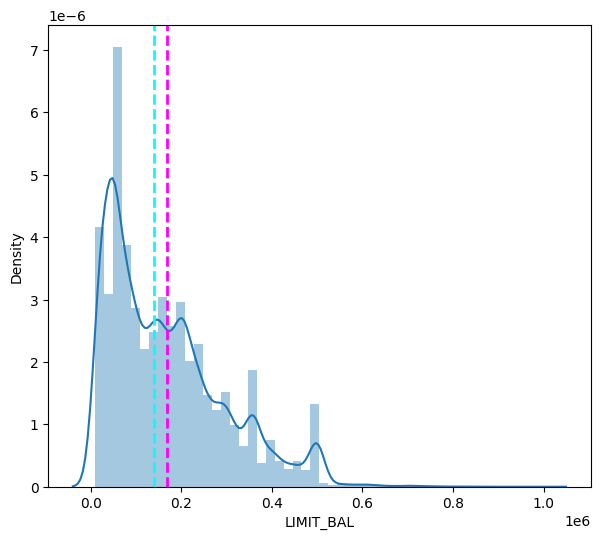

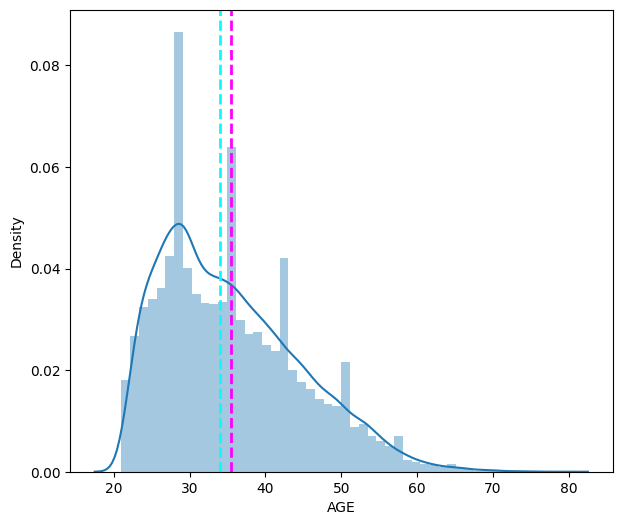

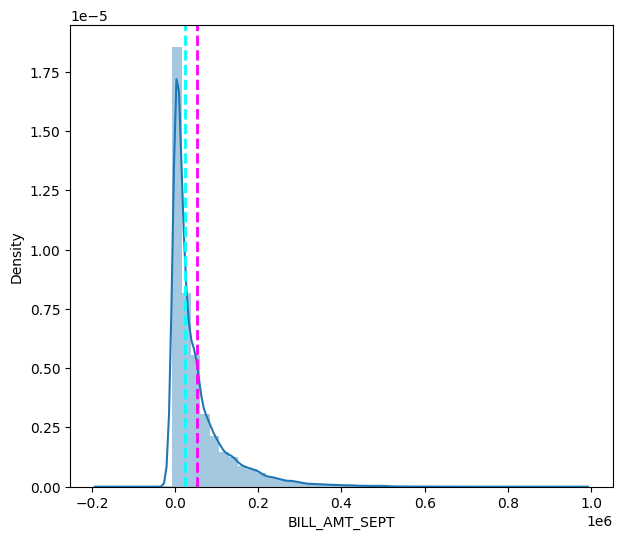

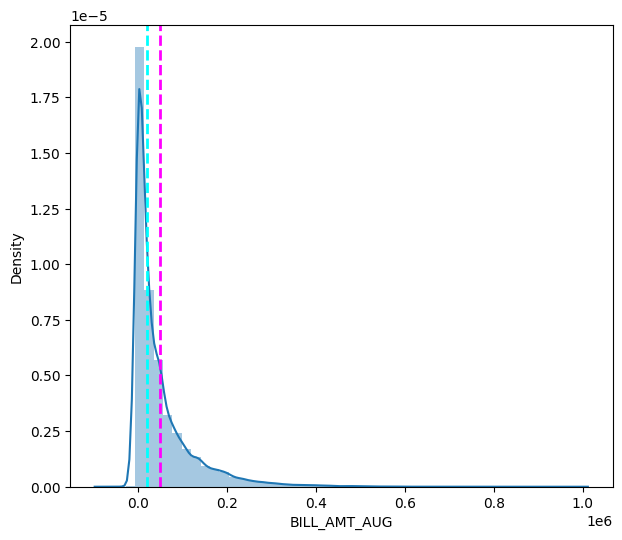

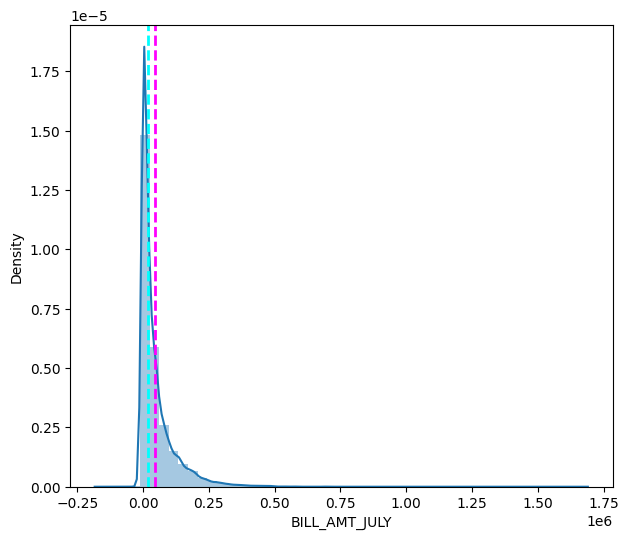

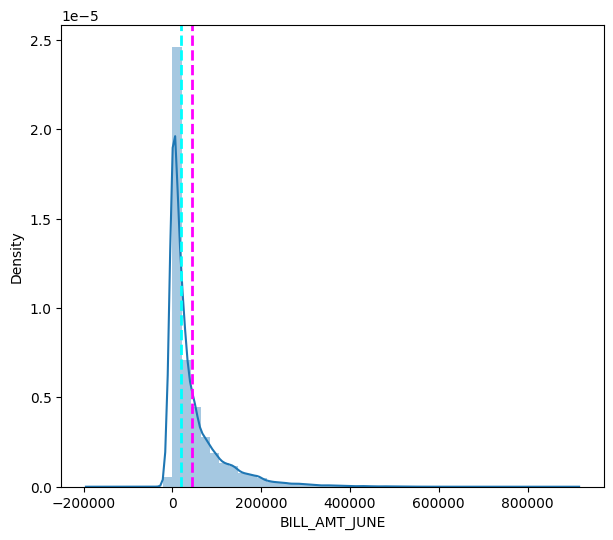

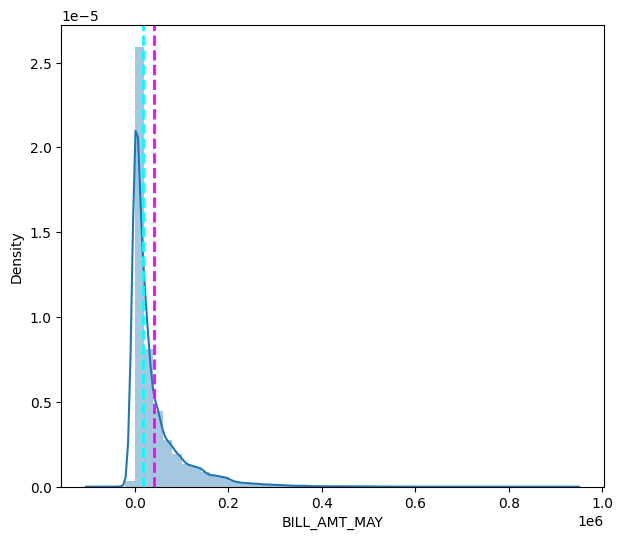

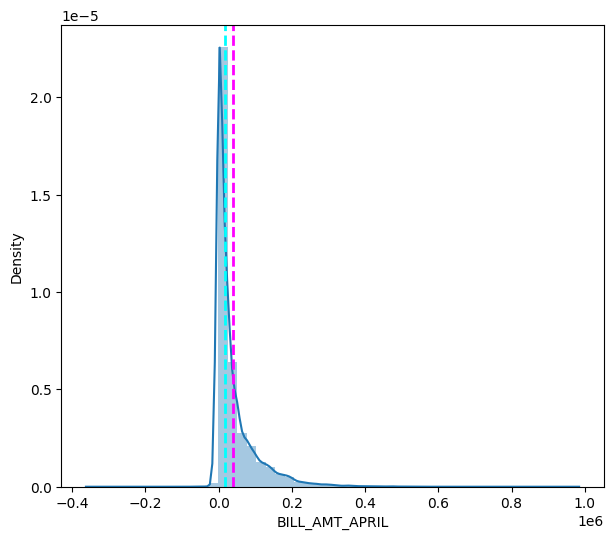

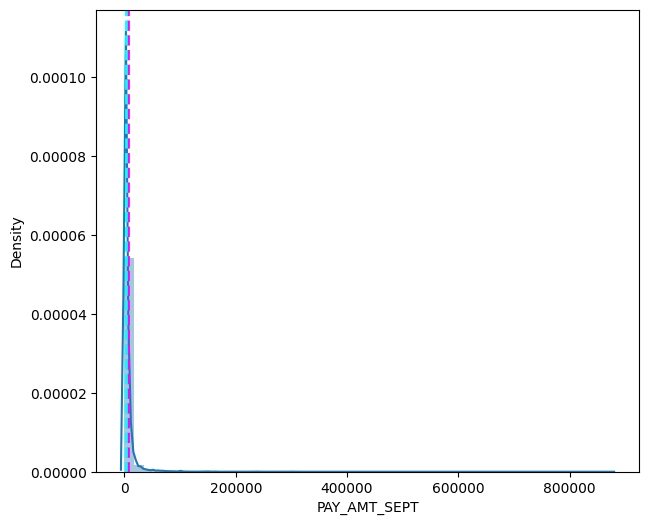

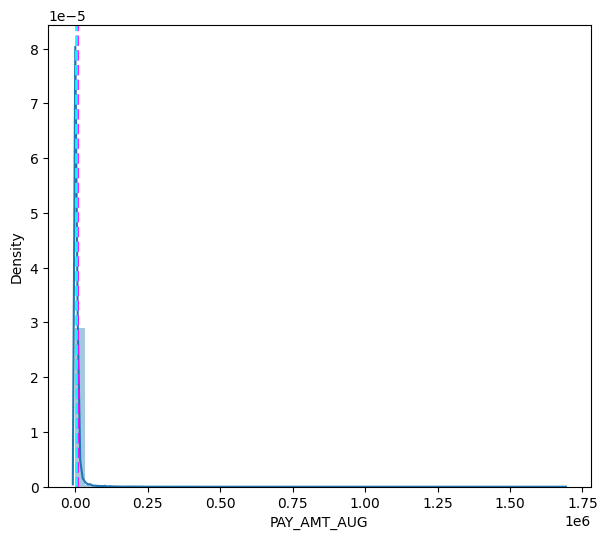

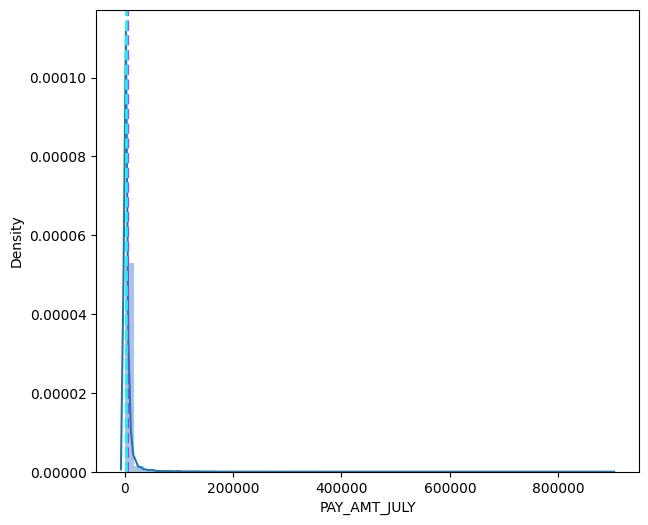

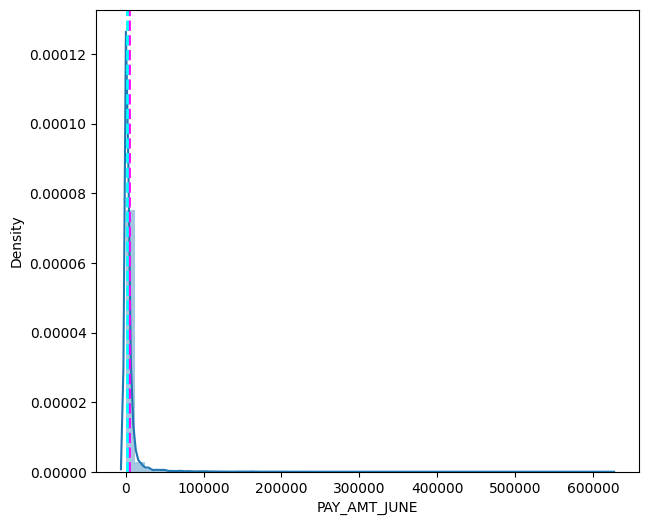

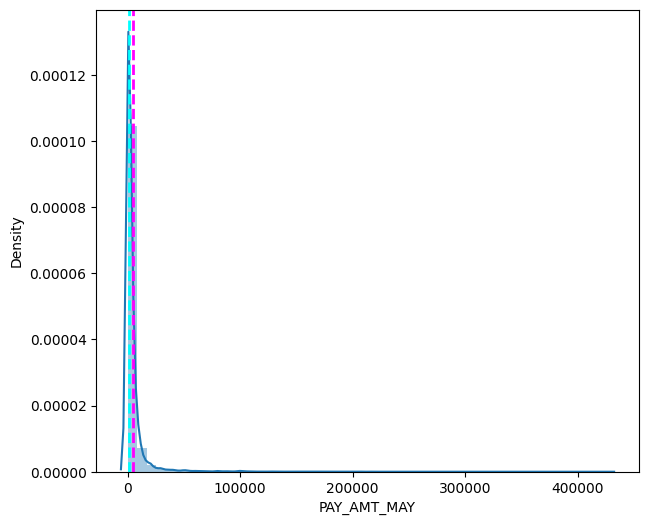

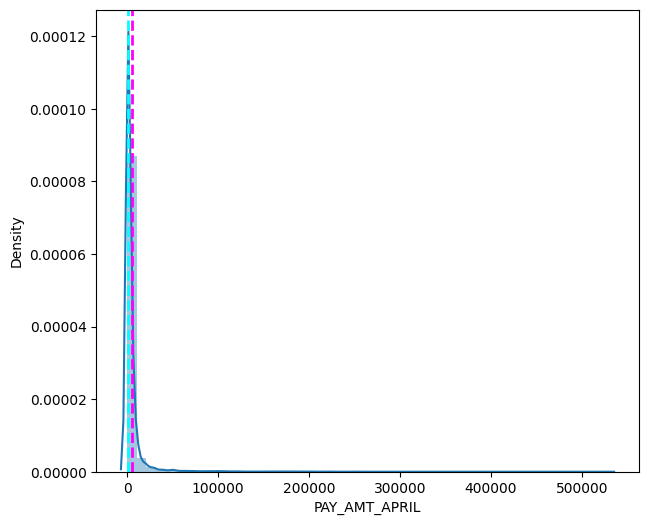

In [20]:
# Chart - 2 visualization code
# Loop to plot distribution graphs of our numerical features
numerical_features=['LIMIT_BAL', 'AGE', 'BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JULY', 'BILL_AMT_JUNE',
       'BILL_AMT_MAY', 'BILL_AMT_APRIL', 'PAY_AMT_SEPT', 'PAY_AMT_AUG',
       'PAY_AMT_JULY', 'PAY_AMT_JUNE', 'PAY_AMT_MAY', 'PAY_AMT_APRIL']
for col in numerical_features:
  plt.figure(figsize=(7,6))
  ax=sns.distplot(copy_df[col])
  ax.axvline(copy_df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(copy_df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

##### 1. Why did you pick the specific chart?

* I have used distplots here to check the distribution of different numerical columns.

##### 2. What is/are the insight(s) found from the chart?

* All the variables are positively skewed.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* These insights can help create positive business impact by analysing these numerical features with different variables.

#### Chart 3 - Categorical Features Distribution (Univariate)

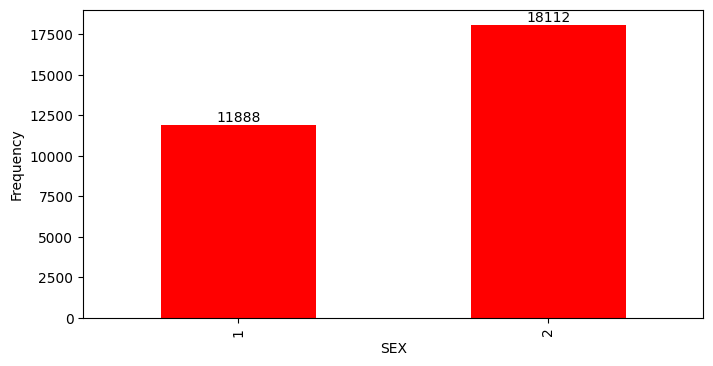

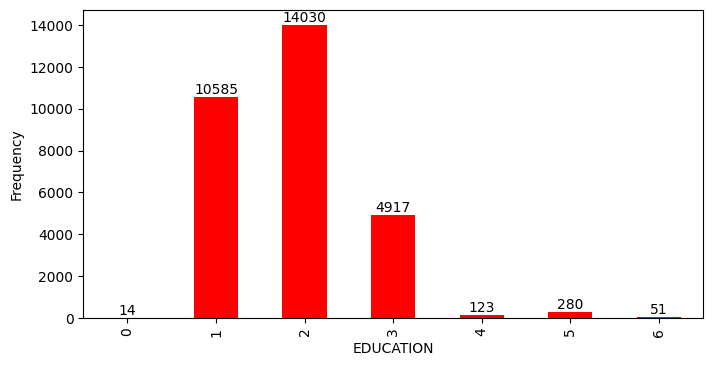

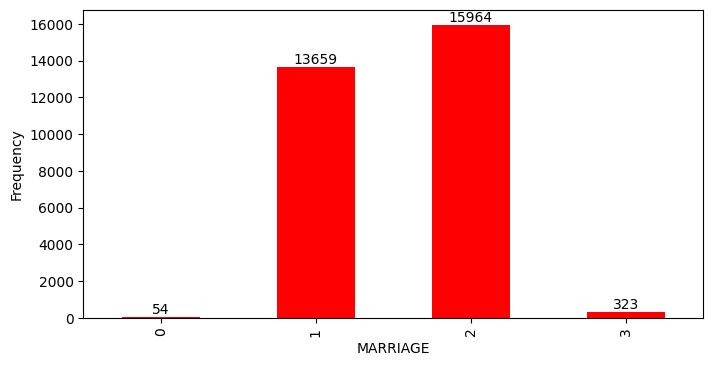

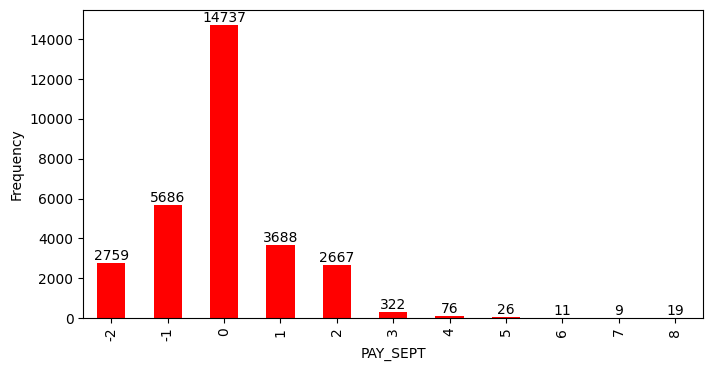

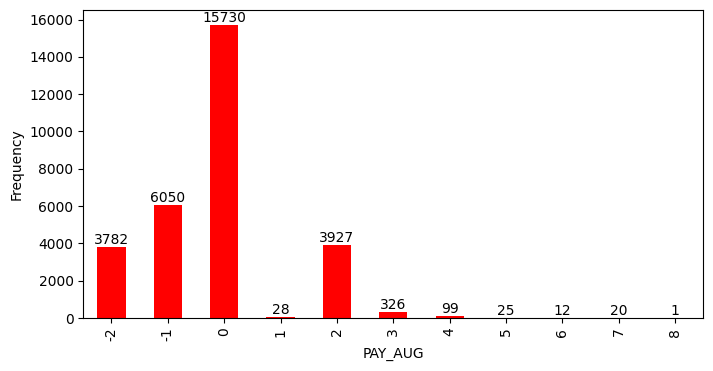

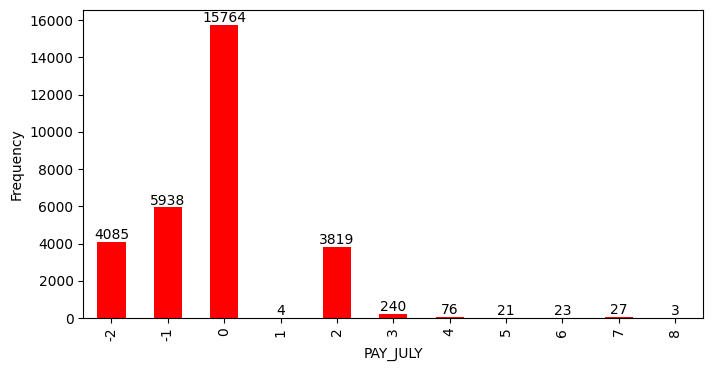

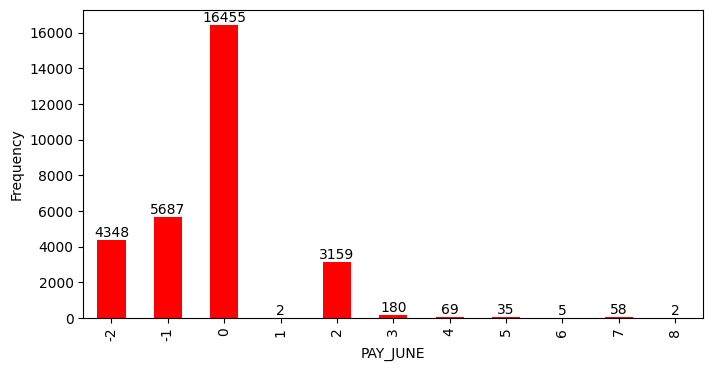

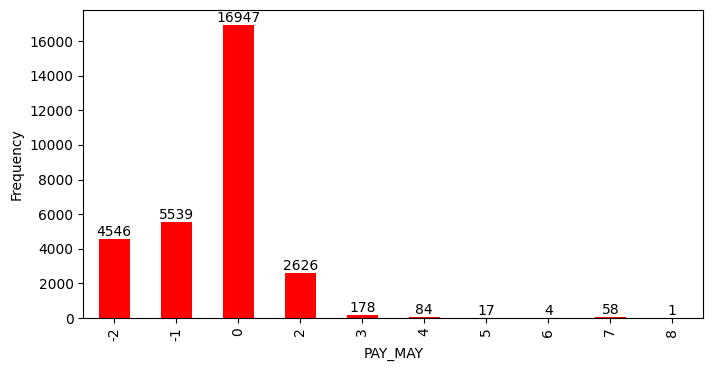

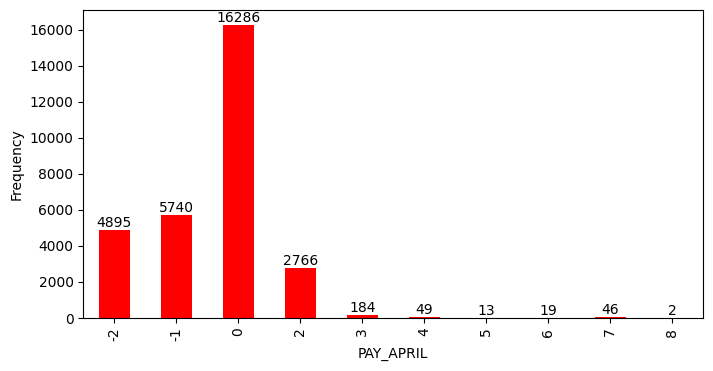

In [21]:
# Chart - 3 visualization code
# plot a bar plot for each categorical feature count  
categorical_features=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JULY', 'PAY_JUNE', 'PAY_MAY', 'PAY_APRIL']
for col in categorical_features:
    counts = copy_df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(8, 4))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='red')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
    for container in ax.containers:
      ax.bar_label(container)
plt.show()

##### 1. Why did you pick the specific chart?

* I have used simple barplot here to see the distribution of different categorical features.

##### 2. What is/are the insight(s) found from the chart?

* Insights about the distribution of categorical features can be found like Most of the clients are female, most clients are University level educated, etc. can be observed here.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* These insights can help create positive business impact by analysing these numerical features with different variables.

#### Chart 4 -  Limit Balance vs Sex vs default payments next month (Multivariate)

<Axes: xlabel='LIMIT_BAL', ylabel='Count'>

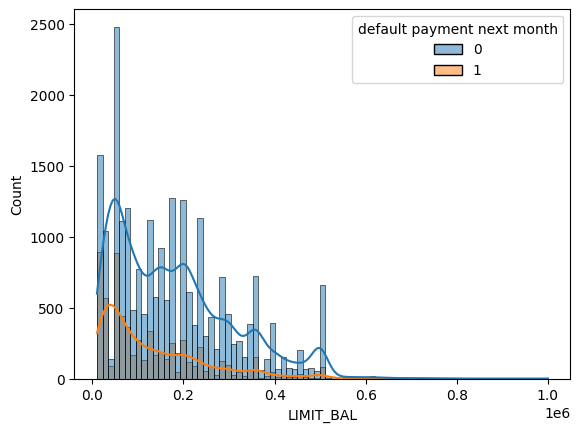

In [22]:
# Chart - 4 visualization code
sns.histplot(x=copy_df['LIMIT_BAL'],hue=copy_df['default payment next month'],kde=True)

In [23]:
copy_df['SEX'].replace({1:'Male',2:'Female'}).value_counts()

Female    18112
Male      11888
Name: SEX, dtype: int64

<Axes: xlabel='default payment next month', ylabel='LIMIT_BAL'>

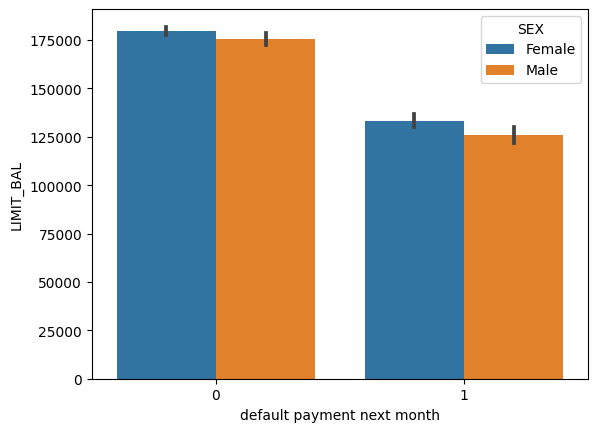

In [24]:
# Multivariate analysis between 'default payment next month', 'LIMIT_BAL' and 'SEX'
sns.barplot(x=copy_df['default payment next month'],y=copy_df['LIMIT_BAL'],hue=copy_df['SEX'].replace({1:'Male',2:'Female'}))

<Axes: xlabel='SEX', ylabel='LIMIT_BAL'>

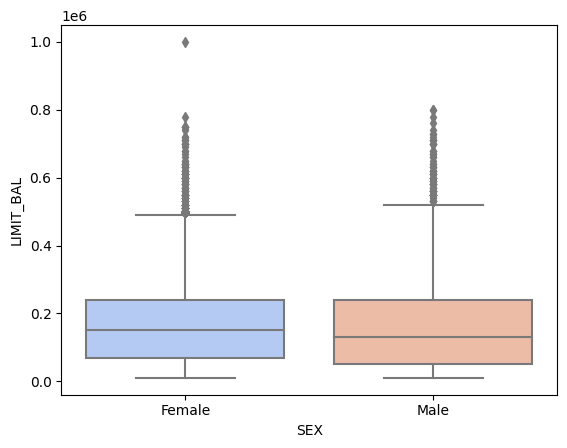

In [25]:
# Bivariate analysis between balance limit and SEX
sns.boxplot(x=copy_df['SEX'].replace({1:'Male',2:'Female'}), y=copy_df['LIMIT_BAL'], palette='coolwarm')

##### 1. Why did you pick the specific chart?

* I choose histplot of seaborn library here to visualize the distribution of Balance Limit and also to compare it with the dependent variable.
* And in the second plot I used Barplot as it helps to compare different variables easily.

##### 2. What is/are the insight(s) found from the chart?

* From the plots we can observe that the variable balance limit is positively skewed for both default and non default customers.
* We have more number of clients having limiting balance between 0 to 200000 currency (NT or New Taiwan dollar).
* The Balance Limit for females are slightly higher if not almost same as males.
* Balance limit for default pay customers are comparatively lower which is justified as higher balance limits are provided to customers with more trust factor.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Understanding the above insights enables more accurate risk assessment and identification of high-risk customers.
* Financial institutions can develop targeted strategies based on balance limits to mitigate the risk of defaults and optimize resources.
* Proactively managing the risk associated with customers across different balance limit segments can minimize defaults and potential financial losses.
* Overall the insights regarding the positively skewed distribution of balance limits can provide valuable information for business decision-making, it should be combined with other relevant factors and considerations. A comprehensive analysis that takes into account additional customer attributes, payment history, and economic factors will lead to more effective risk management and business strategies.

#### Chart 5 - Age vs default payment next month (Bivariate)

In [26]:
# Function to show percentage in countplot
def barPerc(df,xVar,ax):
    '''
    barPerc(): Add percentage for hues to bar plots
    args:
        df: pandas dataframe
        xVar: (string) X variable 
        ax: Axes object (for Seaborn Countplot/Bar plot or
                         pandas bar plot)
    '''
    # 1. how many X categories
    ##   check for NaN and remove
    numX=len([x for x in df[xVar].unique() if x==x])

    # 2. The bars are created in hue order, organize them
    bars = ax.patches
    ## 2a. For each X variable
    for ind in range(numX):
        ## 2b. Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::numX]
        ## 2c. Get the total height (for percentages)
        total = sum([x.get_height() for x in hueBars])

        # 3. Print the percentage on the bars
        for bar in hueBars:
            ax.text(bar.get_x() + bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")

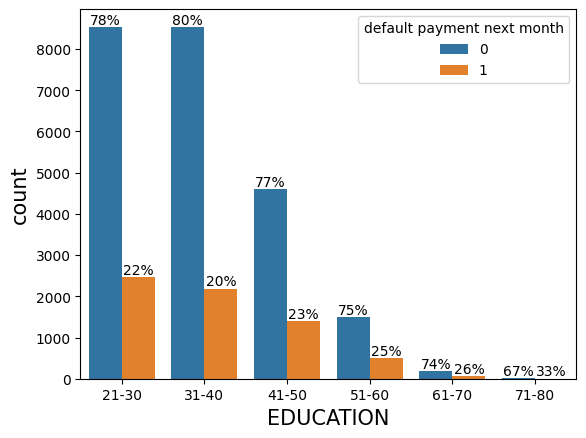

In [27]:
# Chart - 5 visualization code

# creating bins for age groups
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
copy_df['AGE_BIN'] = pd.cut(x=copy_df['AGE'], bins=bins, labels=names)

ax=sns.countplot(x=copy_df['AGE_BIN'],hue=copy_df['default payment next month'])
plt.xlabel('EDUCATION',size=15)
plt.ylabel('count',size=15)
barPerc(copy_df,'AGE_BIN',ax)

##### 1. Why did you pick the specific chart?

* I used countplot here to better visualize the counts of clients for different age groups.

##### 2. What is/are the insight(s) found from the chart?

* Age groups 21 to 30 make up the majority of our clientele, followed by 31 to 40. Therefore, as people get older, there are fewer customers who are likely to default on payment the next month. Thus, it is clear that age is a crucial factor in determining the default payment for the next month.

* However, with increasing age no. of clients decreases but percentage of defaulter clients increases slightly as we can see in graph for age 21-30 default clients percentage is 22% which then dropped to 20% but then increased to 23% then 25%, 26% and finally 33% for age 71-80.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Age is clearly a crucial factor but depending solely on it as a factor for predicting default payment may overlook other significant variables that contribute to payment behavior, such as income, employment status, or credit history. Ignoring these factors could result in inaccurate predictions and negatively impact business decisions.
* While age provides valuable insights, it is important to take into account the increasing default percentages among older age groups.

#### Chart 6 - Education vs default payment next month (Bivariate)

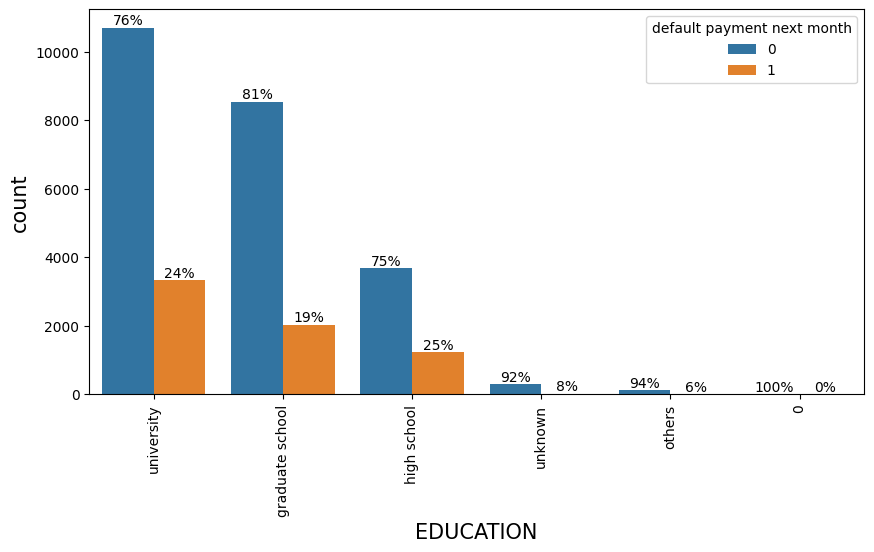

In [28]:
# Chart - 6 visualization code	
# Plotting count plot to show distribution of default payments and non default payments for all education levels
copy_df['EDUCATION']=copy_df['EDUCATION'].replace({1:'graduate school', 2:'university', 3:'high school', 4:'others', 5:'unknown', 6:'unknown'})
plt.figure(figsize=(10,5))
ax=sns.countplot (x=copy_df['EDUCATION'], hue= copy_df['default payment next month'])
plt.xticks(rotation=90)
plt.xlabel('EDUCATION',size=15)
plt.ylabel('count',size=15)
barPerc(copy_df,'EDUCATION',ax)

<Axes: ylabel='EDUCATION'>

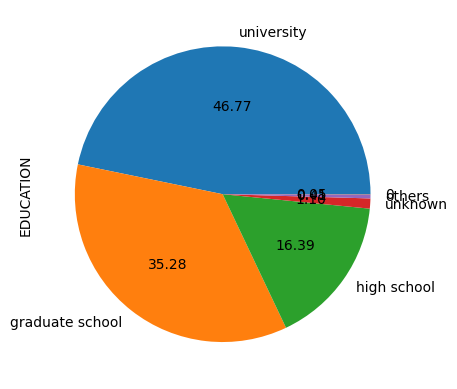

In [29]:
# Pie chart to compare education levels of all clients.
copy_df['EDUCATION'].value_counts().plot(kind='pie',autopct='%.2f')

##### 1. Why did you pick the specific chart?

* Again I have used countplot here, to compare the count of clients for different education levels with default payments. And secondly I have used Pie chart for percentage comparison.

##### 2. What is/are the insight(s) found from the chart?

* By observing the pie chart I can say that almost 50% of clients are university level educated, followed by 35% of clients educated upto graduate school.
* Among the university level educated clients 24% are estimated to be defaulters, while for graduate school it is only 19% and 25% for high school clients.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The analysis indicates that a significant portion of the client base has a higher level of education, with approximately 50% being university-educated and 35% having education up to graduate school. This suggests a relatively educated customer base, which can have positive implications for the business.

* The lower default percentages for clients with higher education levels, such as graduate school (19%), indicate a lower risk of default among this group. This insight can be leveraged to target and attract clients with higher education levels, potentially reducing default rates and improving the business's financial stability.

* While the default percentages vary among different education levels, it is important to note that even university-educated clients have a default rate of 24%. This suggests that education level alone is not a foolproof indicator of default risk. Depending solely on education level to assess default probability may overlook other significant factors that contribute to payment behavior, potentially leading to inaccurate risk assessments and negative impact on business growth.

#### Chart 7 - Marriage vs default payment next month (Bivariate)

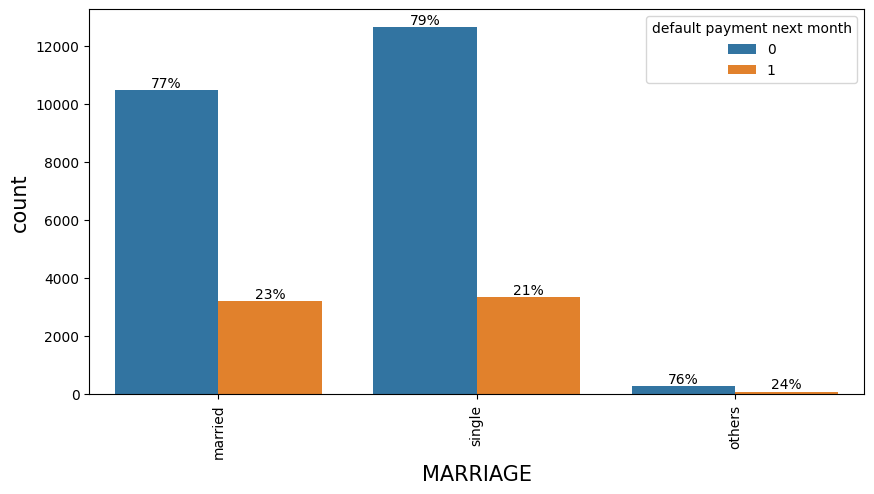

In [30]:
# Chart - 7 visualization code	
# Plotting count plot to show distribution of default payments and non default payments for MARRIED variable
copy_df['MARRIAGE']=copy_df['MARRIAGE'].replace({1:'married', 2:'single', 3:'others', 0:'others'})
plt.figure(figsize=(10,5))
ax=sns.countplot (x=copy_df['MARRIAGE'], hue= copy_df['default payment next month'])
plt.xticks(rotation=90)
plt.xlabel('MARRIAGE',size=15)
plt.ylabel('count',size=15)
barPerc(copy_df,'MARRIAGE',ax)

<Axes: ylabel='MARRIAGE'>

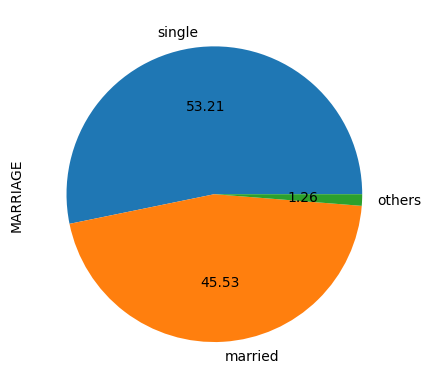

In [31]:
# Pie chart to compare marriage status for all clients in the dataset.
copy_df['MARRIAGE'].value_counts().plot(kind='pie',autopct='%.2f')

##### 1. Why did you pick the specific chart?

* Again I have used countplot here, to compare the count of clients for different education levels with default payments. And secondly I have used Pie chart for percentage comparison.

##### 2. What is/are the insight(s) found from the chart?

* Most of the clients around 53% are single and among them 21% are defaulters.
* Around 45% of the clients are married and default payment percentage is 23%.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The analysis reveals that a significant portion of the client base is single, comprising approximately 53% of the total clients. This insight provides an opportunity to tailor marketing strategies for single individuals, potentially attracting more clients from this demographic.

* The lower default percentage of 21% among single clients suggests a relatively lower risk of default compared to other marital statuses. This insight can be leveraged to target and acquire single clients, who may exhibit more responsible payment behavior and contribute to a positive business impact.

* While single clients have a lower default percentage of 21%, it is important to note that a significant portion of the defaulters are still from this group. Relying solely on marital status as an indicator of default risk may oversimplify the risk assessment process.

* Approximately 45% of the clients are married, indicating a sizable portion of the customer base. However, the default payment percentage among married clients is 23%, which is higher compared to single clients. This suggests a potential risk of default among married individuals, which can negatively impact the business's financial stability.

#### Chart 8 - Repayment status vs default payment next month (Bivariate)

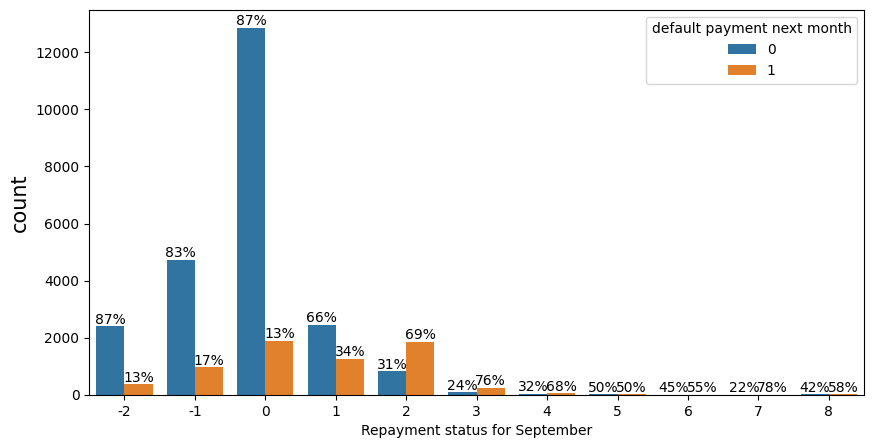

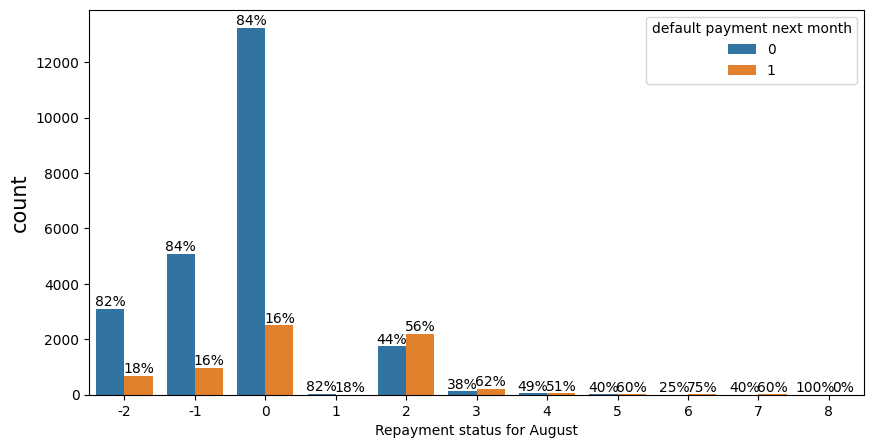

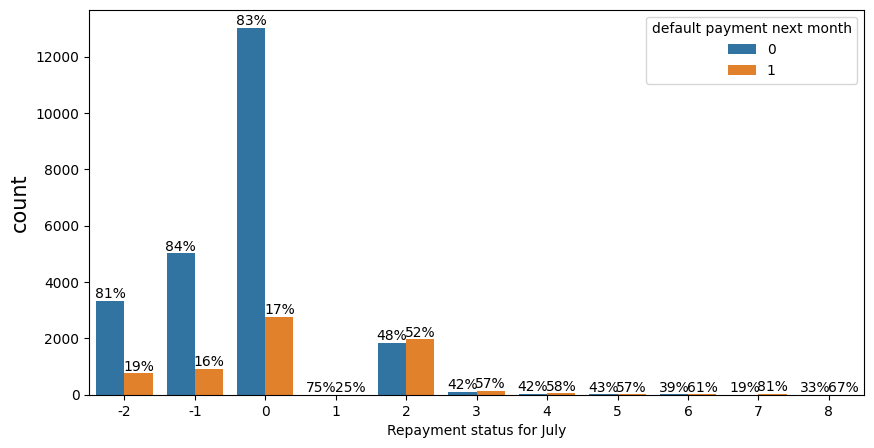

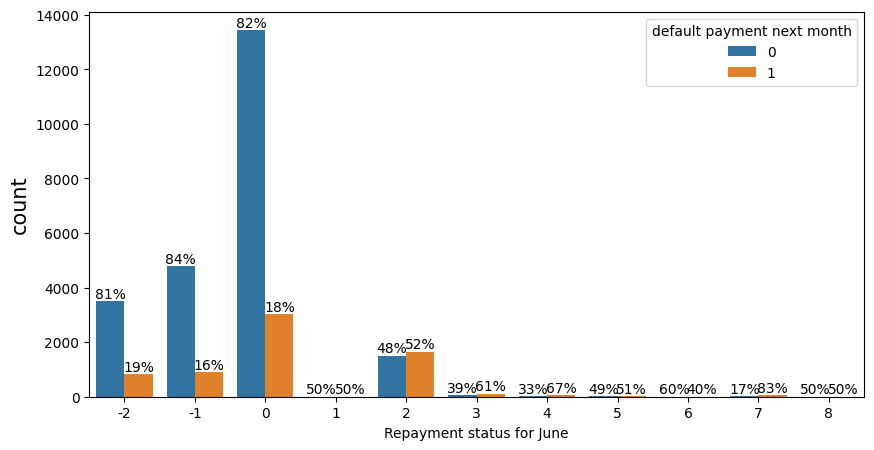

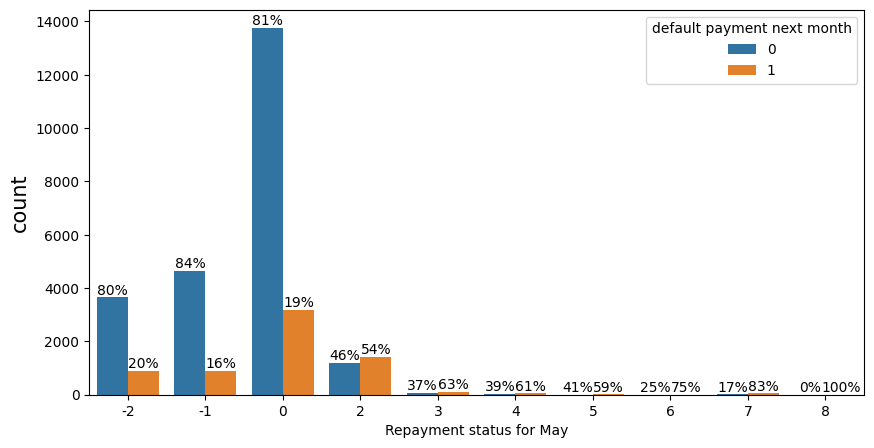

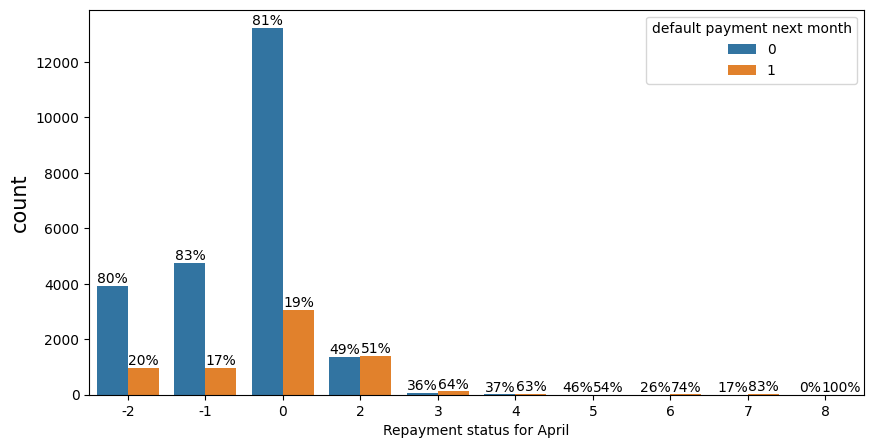

In [32]:
# Chart - 8 visualization code
months=['September','August','July','June','May','April']
col_list=['PAY_SEPT','PAY_AUG', 'PAY_JULY', 'PAY_JUNE', 'PAY_MAY', 'PAY_APRIL']

for m,i in zip(months,col_list):
  plt.figure(figsize=(10,5))
  ax=sns.countplot (x=copy_df[i], hue= copy_df['default payment next month'])
  plt.xlabel(f'Repayment status for {m}')
  plt.ylabel('count',size=15)
  barPerc(copy_df,i,ax)

##### 1. Why did you pick the specific chart?

* I again used countplot for better comparison between different sub categories.

##### 2. What is/are the insight(s) found from the chart?

* The most important insight we can find from this is that if the payments are delayed for 2 months or more then there is more than 50% chances that it is going to be defaulted and this increase with more delay.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The analysis reveals a strong correlation between delayed payments and the likelihood of default. This insight can help the business implement proactive measures to identify and address clients who have delayed payments for multiple months.
* By closely monitoring and proactively engaging with clients who have delayed payments for 2 months or more, the business can take appropriate actions to mitigate the risk of default. This may include offering payment assistance, restructuring payment plans, or providing additional support to help clients fulfill their payment obligations.

#### Chart 9 - Amount of bill statement vs default payment next month (Bivariate)

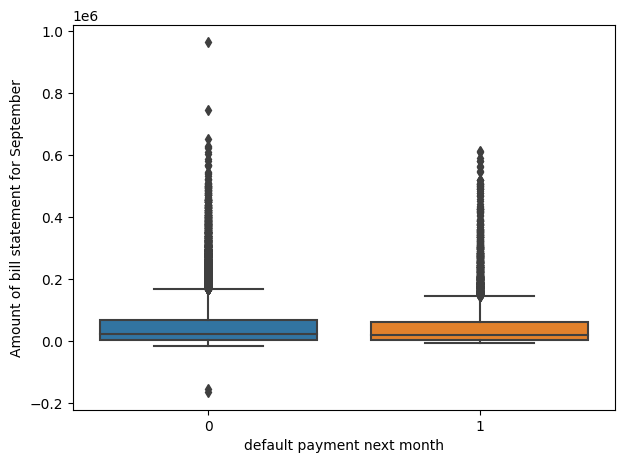

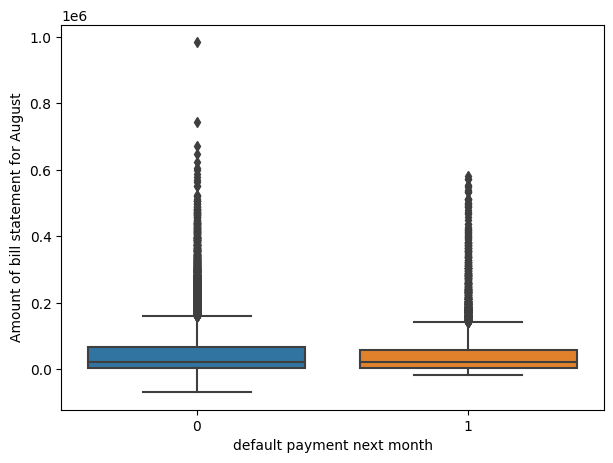

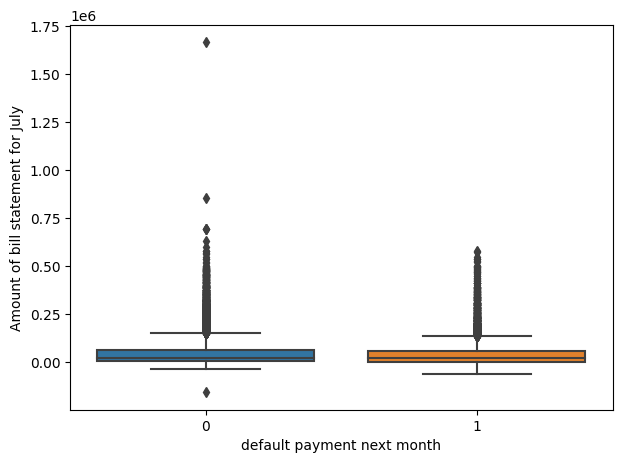

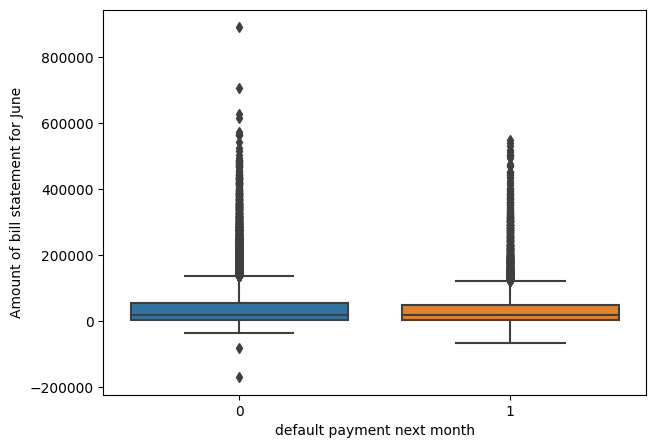

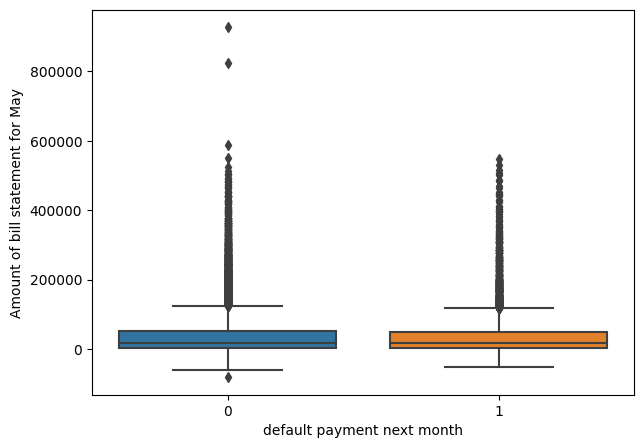

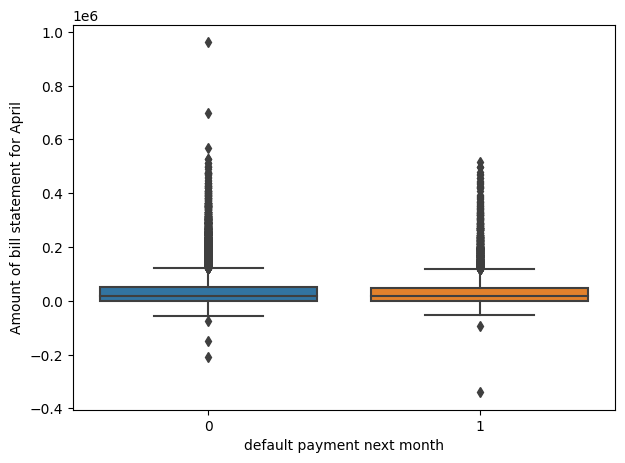

In [33]:
# Chart - 9 visualization code

months=['September','August','July','June','May','April']
col_list=['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JULY', 'BILL_AMT_JUNE', 'BILL_AMT_MAY', 'BILL_AMT_APRIL']

for m,i in zip(months,col_list):
  plt.figure(figsize=(7,5))
  ax=sns.boxplot(y=copy_df[i],x=copy_df['default payment next month'])
  plt.ylabel(f'Amount of bill statement for {m}')
  plt.show()

##### 1. Why did you pick the specific chart?

* I used boxplot here to compare bill amounts of defaulter and non defaulter clients for different months.

##### 2. What is/are the insight(s) found from the chart?

* No important insights were found from the charts.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

NA

#### Chart 10 - Amount of previous payment vs default payment next month

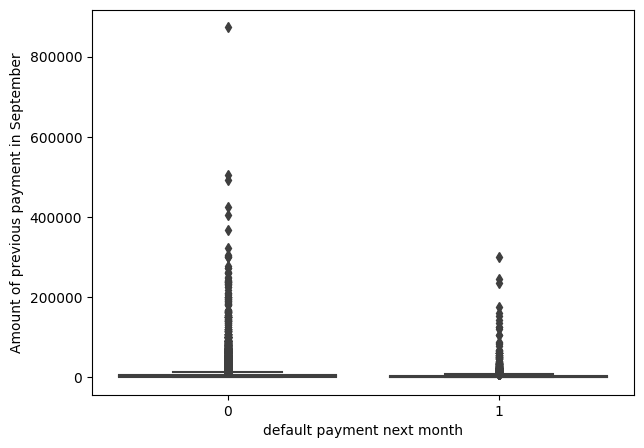

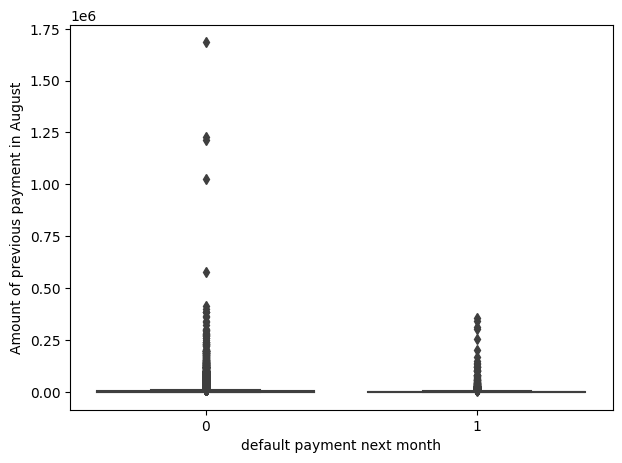

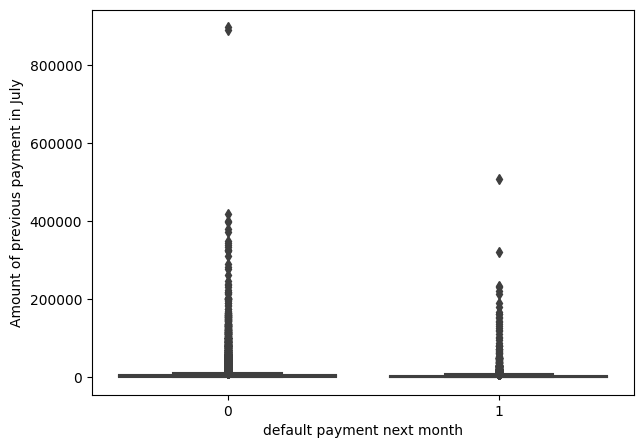

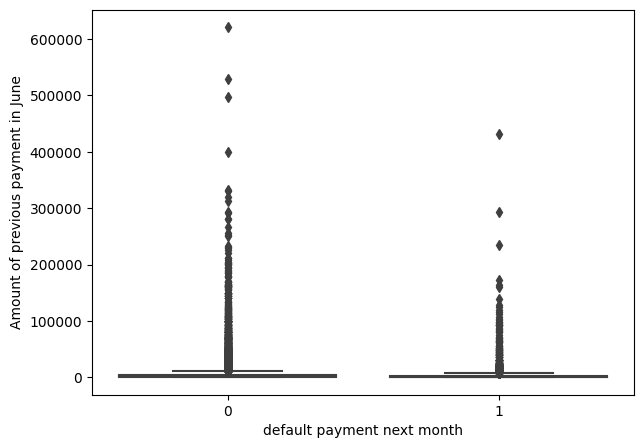

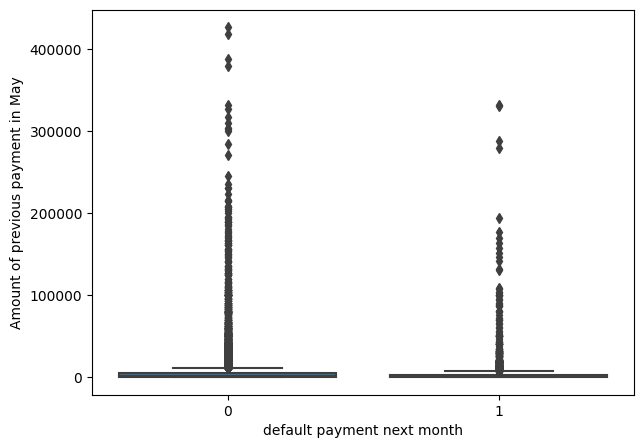

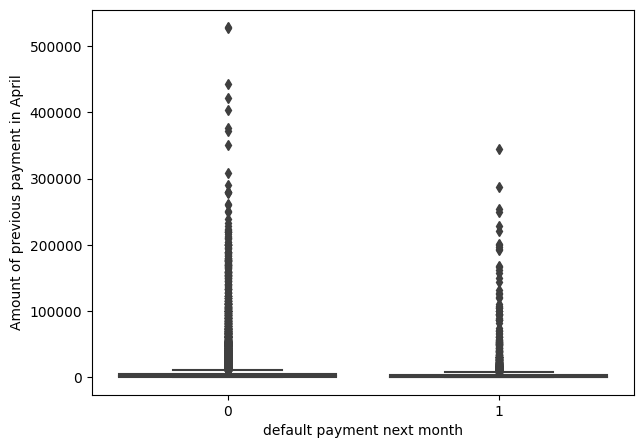

In [34]:
# Chart - 10 visualization code
months=['September','August','July','June','May','April']
col_list=['PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JULY', 'PAY_AMT_JUNE', 'PAY_AMT_MAY', 'PAY_AMT_APRIL']

for m,i in zip(months,col_list):
  plt.figure(figsize=(7,5))
  ax=sns.boxplot(y=copy_df[i],x=copy_df['default payment next month'])
  plt.ylabel(f'Amount of previous payment in {m}')
  plt.show()

##### 1. Why did you pick the specific chart?

* I used boxplot here to compare previous payment amounts in different months for defaulter and non defaulter clients.

##### 2. What is/are the insight(s) found from the chart?

* No important insights were found from the charts.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

NA

#### Chart 11 - Correlation Heatmap

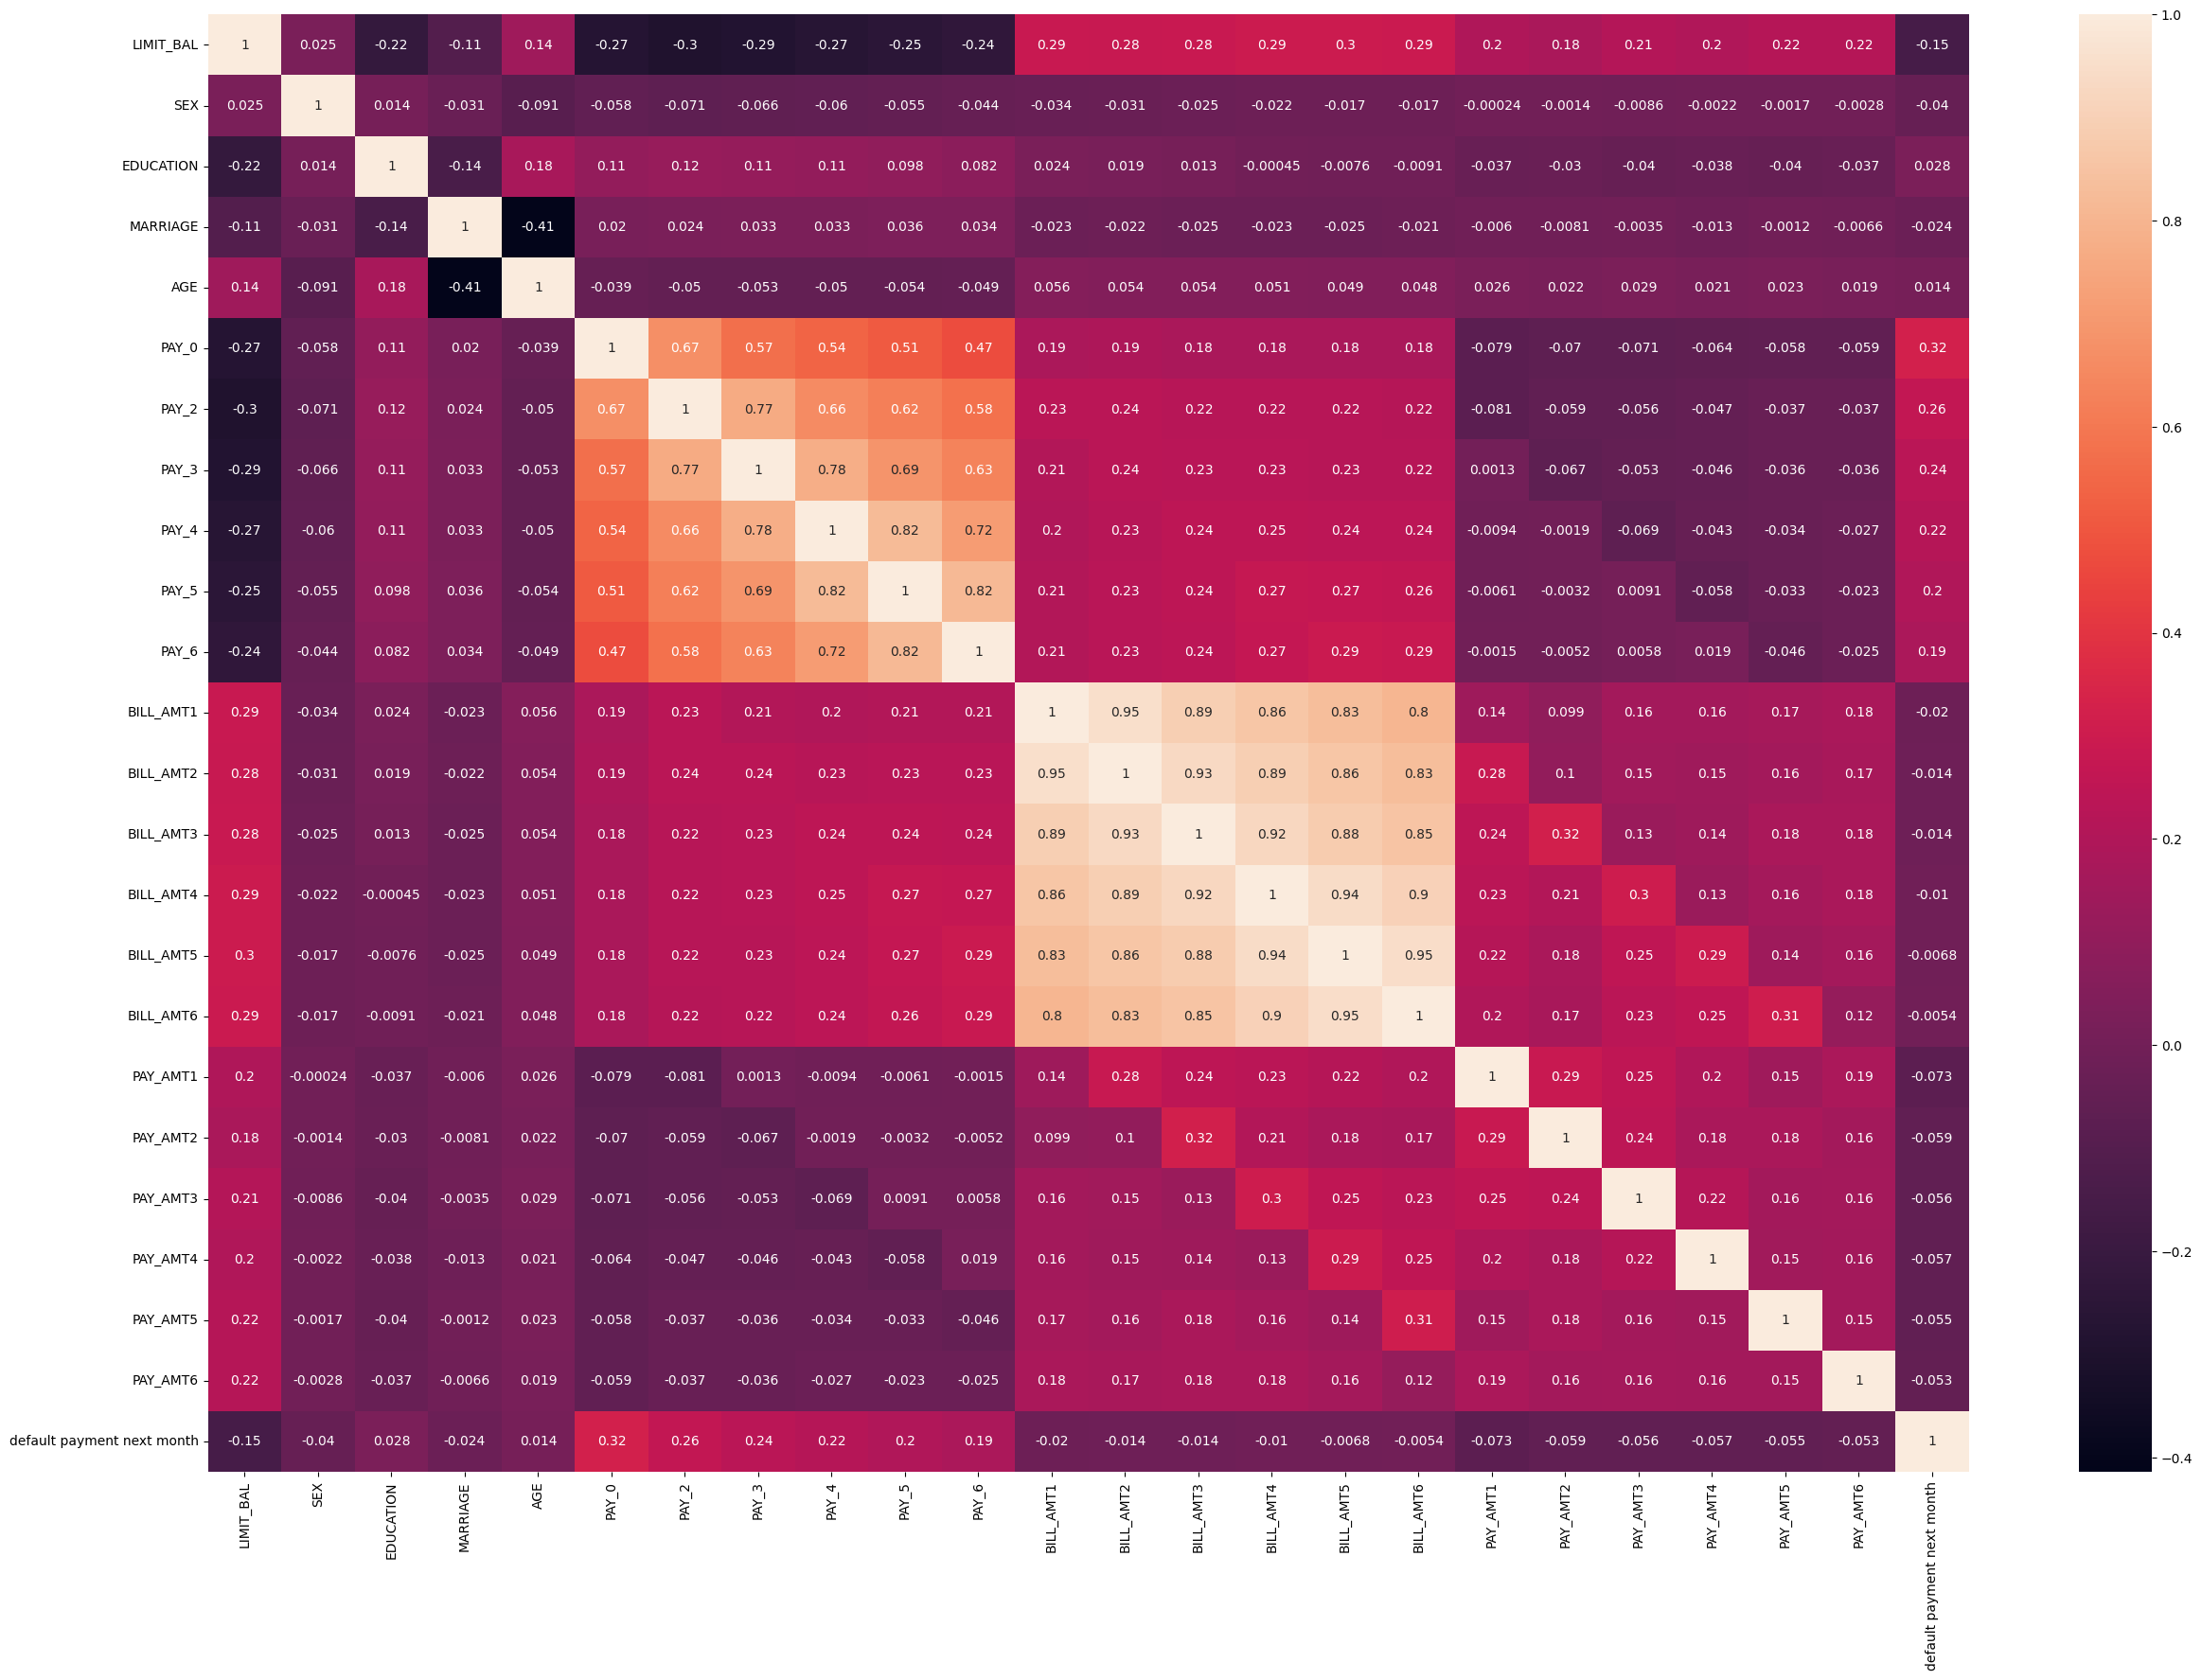

In [35]:
# Correlation Heatmap visualization code
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot=True)
plt.show()

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

* From the heatmap we can see that a lot of variables are correlated especially the repayment status and bill amounts for different months.

#### Chart 12 - Pair Plot 

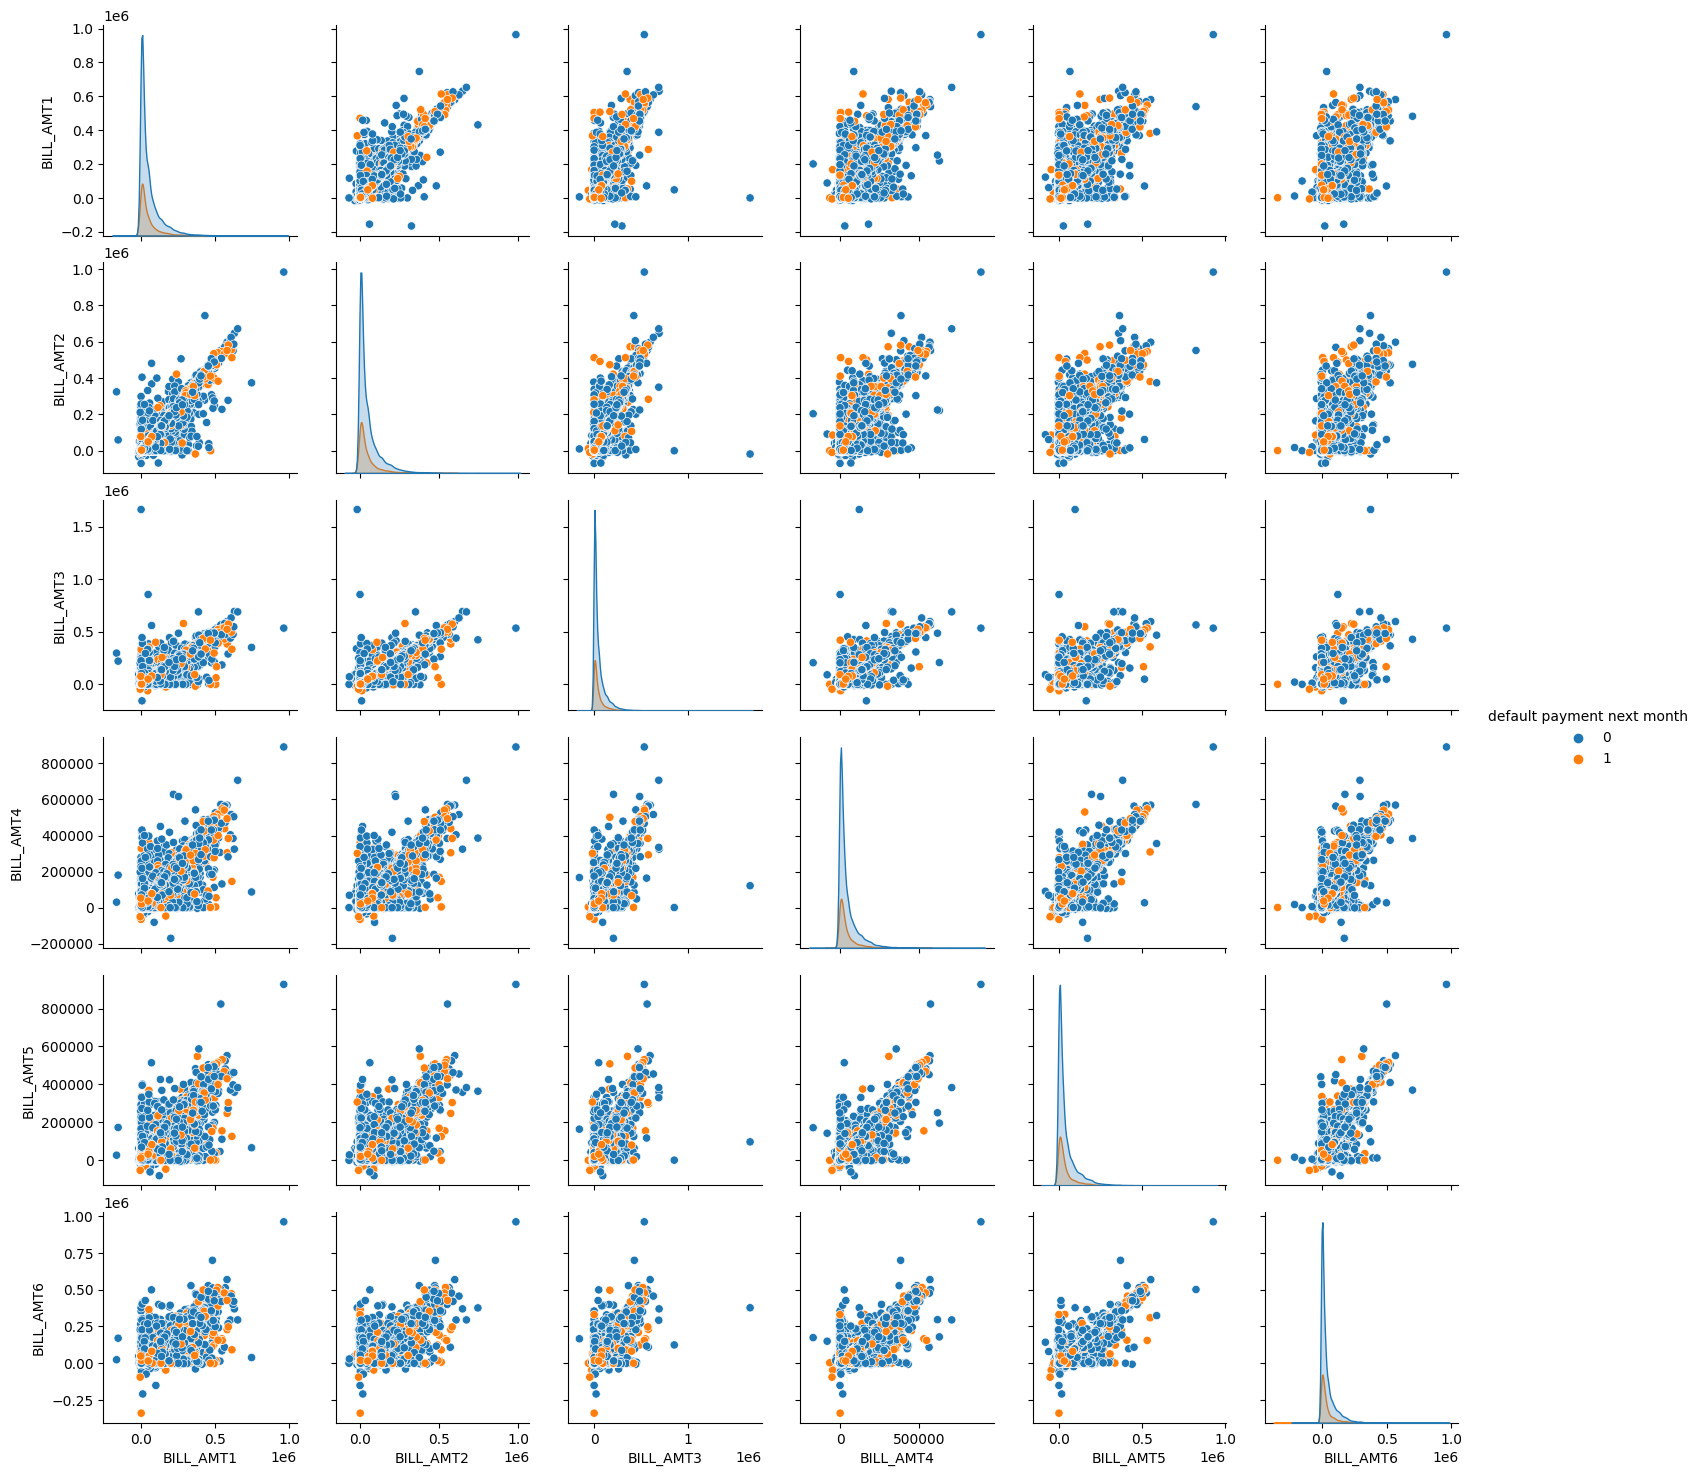

In [36]:
# Pair Plot visualization code
bill_amounts = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','default payment next month']]
sns.pairplot(bill_amounts,hue='default payment next month')

##### 1. Why did you pick the specific chart?

I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know, there are less linear relationship between variables and data poiunts aren't linearly separable. Defaulter and non defaulter client data is clusetered and ovearlapped with each other.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* Hypothesis 01: There is no significant difference in the average bill amount in September, 2005 (BILL_AMT1) between clients who default and clients who do not default.

* Hypothesis 02: There is no significant difference in the average bill amount in August, 2005 (BILL_AMT2) between male and female clients.

* Hypothesis 03: The distribution of balance limit follows a normal distribution.

In [37]:
# Function to give conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (H0): There is no significant difference in the average bill amount in September, 2005 (BILL_AMT1) between clients who default and clients who do not default.
* Alternative Hypothesis (H1): The average bill amount in September, 2005 differs between clients who default and clients who do not default.
* Test: t-test for means

#### 2. Perform an appropriate statistical test.

In [38]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

default_group = df[df['default payment next month']==1]['BILL_AMT1']  # Bill amounts for clients who default
non_default_group = df[df['default payment next month']==0]['BILL_AMT1']  # Bill amounts for clients who do not default

# Perform t-test for means
t_statistic, p_value = ttest_ind(default_group, non_default_group, equal_var=False)

print("T-statistic:", t_statistic)
conclusion(p_value)

T-statistic: -3.3977563037078014


'Null Hypothesis rejected Successfully for p = 0.0006818917909820554'

In [39]:
df.groupby('default payment next month')['BILL_AMT1'].mean()

default payment next month
0    51994.227273
1    48509.162297
Name: BILL_AMT1, dtype: float64

##### Which statistical test have you done to obtain P-Value?

t-test for means

##### Why did you choose the specific statistical test?

I choose this test because it is a test for the null hypothesis that 2 independent samples have identical average (expected) values.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (H0): There is no significant difference in the average bill amount in August, 2005 (BILL_AMT2) between male and female clients.
* Alternative Hypothesis (H1): The average bill amount in August, 2005 differs between male and female clients.
* Test: t-test for means.

#### 2. Perform an appropriate statistical test.

In [40]:
# Perform Statistical Test to obtain P-Value
bill_amt_male = df[df['SEX'] == 1]['BILL_AMT2']  # Bill amounts for male clients
bill_amt_female = df[df['SEX'] == 2]['BILL_AMT2']  # Bill amounts for female clients

# Perform t-test for means
t_statistic, p_value = ttest_ind(bill_amt_male, bill_amt_female, equal_var=False)

print("T-statistic:", t_statistic)
conclusion(p_value)

T-statistic: 5.318352644167872


'Null Hypothesis rejected Successfully for p = 1.0564643470806268e-07'

In [41]:
df.groupby('SEX')['BILL_AMT2'].mean()

SEX
1    51918.541723
2    47380.997736
Name: BILL_AMT2, dtype: float64

##### Which statistical test have you done to obtain P-Value?

t-test for means.

##### Why did you choose the specific statistical test?

I choose this test because it is a test for the null hypothesis that 2 independent samples have identical average (expected) values.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis (H0): The distribution of balance limit follows a normal distribution.
* Alternative hypothesis (Ha): The distribution of balance limit does not follow a normal distribution.
* Test: Z-test for normality.

#### 2. Perform an appropriate statistical test.

In [42]:
# Perform Statistical Test to obtain P-Value
from scipy import stats
Balance_limit = df['LIMIT_BAL'].tolist()

# z-test for normality
z_statistic, p_value = stats.normaltest(Balance_limit)

# Print the z-statistic and conclusion with p value
print("Z-statistic:", z_statistic)
print(conclusion(p_value))

Z-statistic: 3740.095049833546
Null Hypothesis rejected Successfully for p = 0.0


##### Which statistical test have you done to obtain P-Value?

Z-test for normality

##### Why did you choose the specific statistical test?

* I chose the Z-test for normality to test Hypothesis 3 (The distribution of bike rental demand follows a normal distribution) because it specifically focuses on assessing the normality of a distribution. 

* The Z-test for normality is a statistical test used to determine whether a given dataset follows a normal distribution. It is based on comparing the sample data to the expected values under a normal distribution assumption.

## ***6. Feature Engineering & Data Pre-processing***

In [238]:
# Creating a copy of the dataset for further feature engineering
df1=df.copy()

### 1. Handling Missing Values

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


<Axes: >

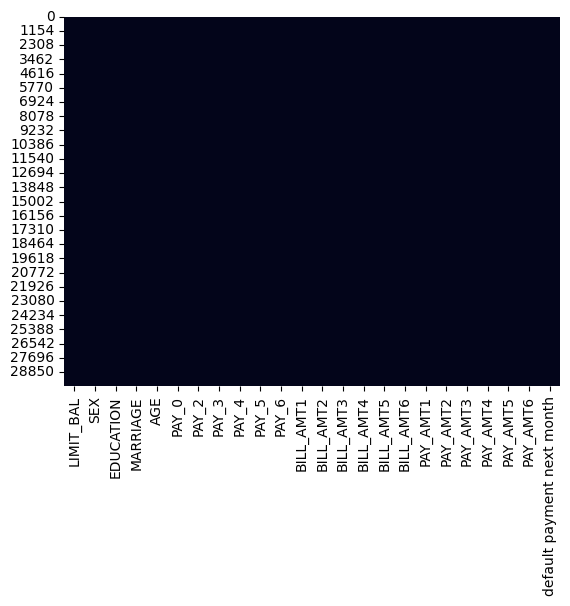

In [239]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
print(df.isnull().sum())

# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

#### What all missing value imputation techniques have you used and why did you use those techniques?

* There are no missing values to handle in the given dataset.

### 2. Handling Outliers

In [240]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


In [241]:
df1.shape

(30000, 24)

In [242]:
# Handling Outliers & Outlier treatments using Isolation Forest
minmax = MinMaxScaler(feature_range=(0, 1))
X = minmax.fit_transform(df1.drop('default payment next month',axis=1))

clf = IsolationForest(n_estimators=100, contamination=0.01, random_state=0)
clf.fit(X)

# predict raw anomaly score
df1['multivariate_anomaly_score'] = clf.decision_function(X)
        
# prediction of a datapoint category outlier or inlier
df1['multivariate_outlier'] = clf.predict(X)

In [243]:
# checking outliers
df1[(df1['multivariate_outlier'] == -1)]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,multivariate_anomaly_score,multivariate_outlier
6,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0,-0.051680,-1
59,400000,2,2,1,29,0,0,0,0,0,0,400134,398857,404205,360199,356656,364089,17000,15029,30000,12000,12000,23000,0,-0.015094,-1
102,480000,1,1,1,63,0,0,0,2,2,0,422069,431342,479432,487066,471145,469961,16078,55693,17000,0,18000,24200,0,-0.078952,-1
214,470000,1,2,2,27,2,2,2,2,0,0,296573,303320,307843,479978,305145,309959,13000,11001,0,10484,10838,10367,0,-0.024130,-1
360,500000,2,2,2,23,4,3,2,0,0,0,507726,509229,499936,505507,484612,419643,10000,0,14000,16500,16000,19000,1,-0.073918,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29605,500000,1,1,1,37,0,0,2,0,0,0,474934,507062,491956,430637,376657,356636,40024,325,15296,12137,12312,14113,0,-0.047464,-1
29820,400000,1,2,2,37,1,-1,0,0,0,0,396343,394858,395716,385947,305542,271385,423903,15100,14600,13000,9500,9500,0,-0.057618,-1
29837,500000,1,1,2,34,0,0,0,0,0,0,494356,488578,488166,485249,441981,424592,17438,18852,16673,15244,15216,16037,0,-0.032132,-1
29883,420000,1,1,1,34,0,0,0,0,0,0,454391,466810,483277,479800,489200,489200,20000,24000,11000,10000,0,11000,0,-0.028768,-1


In [244]:
df1[(df1['multivariate_outlier'] == -1)].shape[0]

300

In [245]:
# dropping outliers
df1=df1.drop( df1[ df1['multivariate_outlier'] == -1 ].index)

In [246]:
df1.shape

(29700, 26)

##### What all outlier treatment techniques have you used and why did you use those techniques?

* I have used Isolation forest alogrithm to detect outliers and then dropped all the outliers.

### 3. Categorical Encoding

In [247]:
# Encode your categorical columns
df1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,multivariate_anomaly_score,multivariate_outlier
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0.190476,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.212437,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.269715,1
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.264108,1
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0.171549,1


In [248]:
# creating bins for age groups
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
df1['AGE_BIN'] = pd.cut(x=df1['AGE'], bins=bins, labels=names)

df1.drop(['AGE','multivariate_anomaly_score','multivariate_outlier'],axis=1,inplace=True)

df1=pd.get_dummies(df1)
df1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,AGE_BIN_21-30,AGE_BIN_31-40,AGE_BIN_41-50,AGE_BIN_51-60,AGE_BIN_61-70,AGE_BIN_71-80
0,20000,2,2,1,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1,0,0,0,0,0
1,120000,2,2,2,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,1,0,0,0,0,0
2,90000,2,2,2,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,1,0,0,0,0
3,50000,2,2,1,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,1,0,0,0,0
4,50000,1,2,1,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,0,0,0,1,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

* Firstly, I have created bins for the age variable then encoded it using OneHotEncoding.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

(NOT APPLICABLE HERE)

#### 1. Expand Contraction

In [200]:
# Expand Contraction

#### 2. Lower Casing

In [201]:
# Lower Casing

#### 3. Removing Punctuations

In [202]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [203]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [204]:
# Remove Stopwords

In [205]:
# Remove White spaces

#### 6. Rephrase Text

In [206]:
# Rephrase Text

#### 7. Tokenization

In [207]:
# Tokenization

#### 8. Text Normalization

In [208]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [209]:
# POS Taging

#### 10. Text Vectorization

In [210]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 5. Feature Manipulation & Selection

#### 1. Feature Manipulation

I have already manipulated the age column in previous steps, other than that according to me no feature manipulation was needed.

#### 2. Feature Selection

In [249]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [250]:
calc_vif(df1[[i for i in df1.describe().columns if i not in ['default payement next month'] ]])

,variables,VIF
0,LIMIT_BAL,1.538625
1,SEX,1.023292
2,EDUCATION,1.129998
3,MARRIAGE,1.250505
4,PAY_0,1.969754
5,PAY_2,3.129505
6,PAY_3,3.626451
7,PAY_4,4.267983
8,PAY_5,4.697112
9,PAY_6,3.255472


In [251]:
calc_vif(df1[[i for i in df1.describe().columns if i not in ['default payement next month','BILL_AMT2','BILL_AMT5','BILL_AMT3','BILL_AMT4','AGE_BIN_21-30'] ]])

,variables,VIF
0,LIMIT_BAL,3.880522
1,SEX,8.360093
2,EDUCATION,5.943395
3,MARRIAGE,6.449447
4,PAY_0,1.969913
5,PAY_2,3.169331
6,PAY_3,3.684071
7,PAY_4,4.412592
8,PAY_5,4.946117
9,PAY_6,3.459997


In [252]:
# dropping high VIF value columns
df1.drop(['BILL_AMT2','BILL_AMT5','BILL_AMT3','BILL_AMT4','AGE_BIN_21-30'],axis=1,inplace=True)

In [253]:
# Select your features wisely to avoid overfitting
X=df1.drop('default payment next month',axis=1)
y=df1['default payment next month']

In [254]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,AGE_BIN_31-40,AGE_BIN_41-50,AGE_BIN_51-60,AGE_BIN_61-70,AGE_BIN_71-80
0,20000,2,2,1,2,2,-1,-1,-2,-2,3913,0,0,689,0,0,0,0,0,0,0,0,0
1,120000,2,2,2,-1,2,0,0,0,2,2682,3261,0,1000,1000,1000,0,2000,0,0,0,0,0
2,90000,2,2,2,0,0,0,0,0,0,29239,15549,1518,1500,1000,1000,1000,5000,1,0,0,0,0
3,50000,2,2,1,0,0,0,0,0,0,46990,29547,2000,2019,1200,1100,1069,1000,1,0,0,0,0
4,50000,1,2,1,-1,0,-1,0,0,0,8617,19131,2000,36681,10000,9000,689,679,0,0,1,0,0


##### What all feature selection methods have you used  and why?

For feature selection I first found the features which could cause multicollinearity problem then dropped them.

### 6. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [255]:
# Transform Your data

# Function to apply diffrent tranformation technique and checking data distributation
def transform(col):
  fig,axes = plt.subplots(1,4,figsize=(20,5))
  sns.distplot((df1[col]),ax=axes[0],color='brown').set_title(" Input data")
  sns.distplot(np.log10(df1[col]+0.0000001),ax=axes[1],color='red').set_title(f"log10\nskew: {np.log10(df1[col]+0.0000001).skew()}") #transform only posible in positive value and >0 value so add 0.0000001 in data
  sns.distplot(np.sqrt(df1[col]),ax=axes[2], color='blue').set_title(f"Square root\nskew: {np.sqrt(df1[col]).skew()}")
  sns.distplot(np.cbrt(df1[col]),ax=axes[3], color='green').set_title(f"cube root\nskew: {np.cbrt(df1[col]).skew()}")
  plt.show()

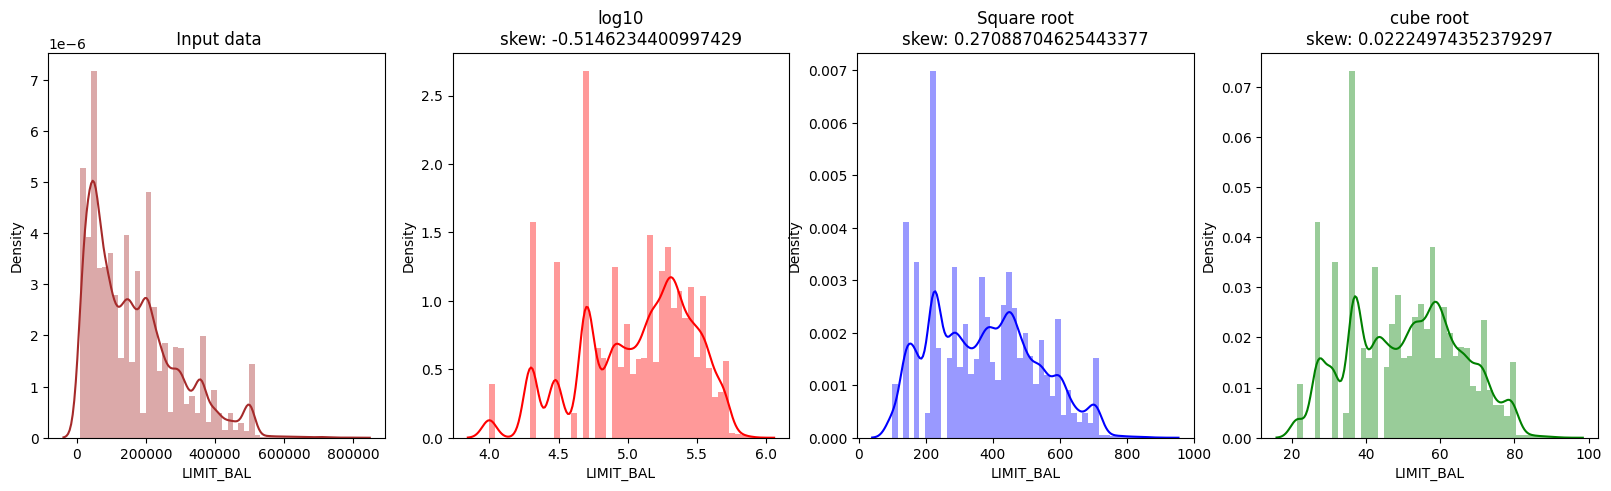

In [256]:
transform('LIMIT_BAL')

In [257]:
# Applying Cube root transformation as it was giving us the least skew
X['LIMIT_BAL']=np.cbrt(X['LIMIT_BAL'])

* I applied cube root transformation on Balance limit column to make it more like normal distribution as models like Logistic regression and some other data science models assume that the variables follow a normal distribution..

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

* As per my knowledge, for this dataset dimensionality reduction is not required.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Handling Imbalanced Dataset

<Axes: ylabel='default payment next month'>

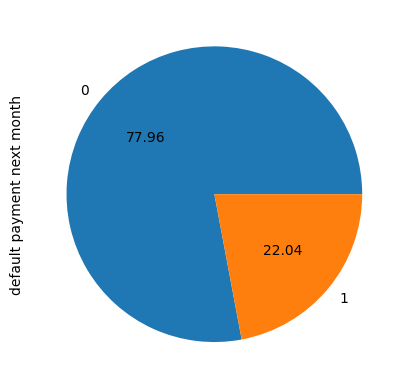

In [265]:
df1['default payment next month'].value_counts().plot(kind='pie',autopct='%.2f')

##### Do you think the dataset is imbalanced? Explain Why.

* Yes, the dataset is highly imbalanced, as there are only 22% defaulters but to train the model more efficiently balanced dataset is required.

In [259]:
# Handling Imbalanced Dataset (If needed)
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X,y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46308


<Axes: ylabel='default payment next month'>

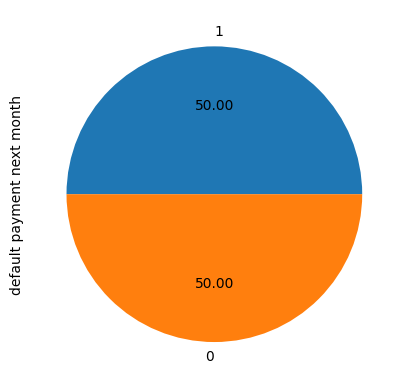

In [260]:
y_smote.value_counts().plot(kind='pie',autopct='%.2f')

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I have used SMOTE (Synthetic Minority Over-sampling technique) for balancing the 78:22 dataset.

SMOTE is a technique in machine learning for dealing with issues that arise when working with an unbalanced data set. In practice, unbalanced data sets are common and most ML algorithms are highly prone to unbalanced data so we need to improve their performance by using techniques like SMOTE.

### 9. Data Splitting

In [263]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.2,random_state=42)

# info about train and test set
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape ", X_test.shape)
print("y_test shape ", y_test.shape)

X_train shape:  (37046, 23)
y_train shape:  (37046,)
X_test shape  (9262, 23)
y_test shape  (9262,)


##### What data splitting ratio have you used and why? 

* I have moderate shape data, so I have used standard 4:1 train test split.

### 10. Data Scaling

In [264]:
# Scaling your data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std =scaler.transform(X_test)

##### Which method have you used to scale you data and why?

* I have used standard scaler here, because some algorithms perform good on scaled data.

## ***7. ML Model Implementation***

In [270]:
!pip install -U prettytable

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: prettytable
    Found existing installation: prettytable 0.7.2
    Uninstalling prettytable-0.7.2:
      Successfully uninstalled prettytable-0.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.4.1 requires prettytable<1, but you have prettytable 3.7.0 which is incompatible.


### Function to fit model and show classification metrics

In [281]:
# making a function to train and evaluate linear model
def train_model(model,X_train,X_test):

  #training the model
  model.fit(X_train,y_train)

  #predicting the values
  y_train_pred=model.predict(X_train)
  y_pred = model.predict(X_test)

  from prettytable import PrettyTable
  x1 = PrettyTable()
  print('Evalution Metrics for training data:\n')

  x1.field_names = ['Metric','Value']
  x1.add_rows(
      [
          ["Accuracy", np.round(accuracy_score(y_train,y_train_pred),4)],
          ["Precision", np.round(precision_score(y_train,y_train_pred),4)],
          ["Recall", np.round(recall_score(y_train,y_train_pred),4)],
          ["f1 score", np.round(f1_score(y_train,y_train_pred),4)],
          ["roc_auc_score", np.round(roc_auc_score(y_train,y_train_pred),4)],
      ]
  )
  print(x1)
  print('\nconfusion_matrix: \n ',confusion_matrix(y_train,y_train_pred))
  print('\nClassification Report:\n')
  print(classification_report(y_train, y_train_pred))
  
  print('-'*54)

  print('\nEvalution Metrics for test data:\n')
  
  x2= PrettyTable()
  x2.field_names = ['Metric','Value']
  x2.add_rows(
      [
          ["Accuracy", np.round(accuracy_score(y_test,y_pred),4)],
          ["Precision", np.round(precision_score(y_test,y_pred),4)],
          ["Recall", np.round(recall_score(y_test,y_pred),4)],
          ["f1 score", np.round(f1_score(y_test,y_pred),4)],
          ["roc_auc_score", np.round(roc_auc_score(y_test,y_pred),4)],
      ]
  )
  print(x2)
  print('\nconfusion_matrix: \n ',confusion_matrix(y_test,y_pred))
  print('\nClassification Report:\n')
  print(classification_report(y_test, y_pred))

In [286]:
# An empty list to append best estimators of each model
best_models=[]

### ML Model - 1

In [284]:
# ML Model - 1 Implementation
clf1= LogisticRegression()
train_model(clf1,X_train_std,X_test_std)

Evalution Metrics for training data:

+---------------+--------+
|     Metric    | Value  |
+---------------+--------+
|    Accuracy   | 0.7564 |
|   Precision   | 0.758  |
|     Recall    | 0.7526 |
|    f1 score   | 0.7553 |
| roc_auc_score | 0.7564 |
+---------------+--------+

confusion_matrix: 
  [[14097  4446]
 [ 4578 13925]]

Classification Report:

              precision    recall  f1-score   support

           0       0.75      0.76      0.76     18543
           1       0.76      0.75      0.76     18503

    accuracy                           0.76     37046
   macro avg       0.76      0.76      0.76     37046
weighted avg       0.76      0.76      0.76     37046

------------------------------------------------------

Evalution Metrics for test data:

+---------------+--------+
|     Metric    | Value  |
+---------------+--------+
|    Accuracy   | 0.7555 |
|   Precision   | 0.762  |
|     Recall    | 0.7461 |
|    f1 score   | 0.7539 |
| roc_auc_score | 0.7555 |
+-------

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***